<a href="https://colab.research.google.com/github/HarshiniDonepudi/iNFO5610Project1/blob/main/INFO_5610_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Mount Shared Drive**

to access shared drive create a shortcut to the shared folder in your drive and change the drive path to the shortcut

In [10]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

import os

os.chdir("/content/drive/My Drive")
master_folder_path = '/content/drive/MyDrive/INFO 5610 Project-1/Project 1 2023 HealthEx Data'
extraction_dir = '/content/drive/MyDrive/INFO 5610 Project-1/participant_csv'

Mounted at /content/drive


## **Data Cleaning**

In [ ]:
import pandas as pd # Pandas
import numpy as np # Numpy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams["figure.figsize"]=(10,5)

Running the next cell is not necessary directly go to dataframe creation

In [ ]:
import zipfile
import pandas as pd
import csv
import os

def extract_csv_from_zip(zip_file, extraction_dir):
    participant_id = os.path.basename(zip_file).split('_')[0]
    extraction_subdir = os.path.join(extraction_dir, f"Participant_{participant_id}")

    csv_files = []

    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        for zip_info in zip_ref.infolist():
            if zip_info.filename.startswith(f"{participant_id}_HealthEx/") and zip_info.filename.endswith('.csv'):
                csv_path = os.path.join(extraction_subdir, zip_info.filename[len(f"{participant_id}_HealthEx/"):])
                csv_files.append(csv_path)
                zip_ref.extract(zip_info.filename, extraction_subdir)
                print(f"Extracted {zip_info.filename} to {csv_path}")

    return csv_files

def read_csv_files(csv_files, extraction_dir):
    for csv_file in csv_files:
        # Check if the CSV file exists
        if os.path.exists(csv_file):
            # Using pandas to read CSV
            df = pd.read_csv(csv_file)
            print(f"Data from {csv_file}:")
            print(df)
        else:
            print(f"CSV file not found: {csv_file}")



# Get a list of all zip files in the master folder
zip_files = [os.path.join(master_folder_path, file) for file in os.listdir(master_folder_path) if file.endswith('_HealthEx.zip')]

# Extract CSV files and read them for each zip file
for zip_file in zip_files:
    print(f"\nProcessing {zip_file}:")
    csv_files = extract_csv_from_zip(zip_file, extraction_dir)



Processing /content/drive/MyDrive/INFO 5610 Project-1/Project 1 2023 HealthEx Data/11_HealthEx.zip:

Processing /content/drive/MyDrive/INFO 5610 Project-1/Project 1 2023 HealthEx Data/2_HealthEx.zip:

Processing /content/drive/MyDrive/INFO 5610 Project-1/Project 1 2023 HealthEx Data/16_HealthEx.zip:

Processing /content/drive/MyDrive/INFO 5610 Project-1/Project 1 2023 HealthEx Data/5_HealthEx.zip:

Processing /content/drive/MyDrive/INFO 5610 Project-1/Project 1 2023 HealthEx Data/7_HealthEx.zip:

Processing /content/drive/MyDrive/INFO 5610 Project-1/Project 1 2023 HealthEx Data/9_HealthEx.zip:

Processing /content/drive/MyDrive/INFO 5610 Project-1/Project 1 2023 HealthEx Data/1_HealthEx.zip:

Processing /content/drive/MyDrive/INFO 5610 Project-1/Project 1 2023 HealthEx Data/3_HealthEx.zip:

Processing /content/drive/MyDrive/INFO 5610 Project-1/Project 1 2023 HealthEx Data/10_HealthEx.zip:

Processing /content/drive/MyDrive/INFO 5610 Project-1/Project 1 2023 HealthEx Data/14_HealthEx.z

Running the next cell is not necessary directly go to dataframe creation

In [ ]:
import os
import shutil

# Path to the parent folder containing participant data folders
parent_folder_path = "/content/drive/MyDrive/INFO 5610 Project-1/participant_csv"

# Iterate through each subfolder (Participant_i)
for participant_folder in os.listdir(parent_folder_path):
    participant_folder_path = os.path.join(parent_folder_path, participant_folder)
    # Check if the subfolder is a directory
    if os.path.isdir(participant_folder_path):

        # Path to the HealthEx folder for this participant
        healthex_folder_path = os.path.join(participant_folder_path, "HealthEx")

        # Check if the HealthEx folder exists
        if os.path.exists(healthex_folder_path) and os.path.isdir(healthex_folder_path):

            # Move CSV files from HealthEx folder to Participant_i folder
            for csv_file in os.listdir(healthex_folder_path):
                csv_file_path = os.path.join(healthex_folder_path, csv_file)
                destination_path = os.path.join(participant_folder_path, csv_file)
                shutil.move(csv_file_path, destination_path)

            # Remove the HealthEx folder
            shutil.rmtree(healthex_folder_path)

print("CSV files moved and HealthEx folders deleted successfully.")

CSV files moved and HealthEx folders deleted successfully.


##**Dataframe Creation**

In [ ]:
import os
import pandas as pd

github_url = "/content/drive/MyDrive/INFO 5610 Project-1/participant_csv"
max_participant_id = 18

# Dictionary to store data frames for each attribute
attribute_data = {}

# Iterate through participant IDs
for participant_id in range(1, max_participant_id + 1):
    participant_id_str = f'{participant_id:0d}'  # Format participant ID with leading zeros

    # Get list of CSV files in the participant folder
    participant_folder_path = f"{github_url}/Participant_{participant_id_str}"
    current_directory = os.getcwd()
    print("Current Directory:", current_directory)

    directory_path = '/content/drive/MyDrive/INFO 5610 Project-1/participant_csv/Participant_1'

    if os.path.exists(directory_path):
      print(f"The directory '{directory_path}' exists.")
    if not os.path.exists(participant_folder_path):
        continue  # Skip if participant folder doesn't exist

    csv_files = [f for f in os.listdir(participant_folder_path) if f.endswith('.csv')]

    # Iterate through CSV files and read data into data frames
    for csv_file in csv_files:
        attribute_name = os.path.splitext(csv_file)[0]  # Attribute name is the file name without extension

        # Load the CSV file and add the participant ID
        df = pd.read_csv(os.path.join(participant_folder_path, csv_file))

        # Shift values from one column to the next and replace the first column with index values
        for i in range(len(df.columns) - 1, 0, -1):
            df.iloc[:, i] = df.iloc[:, i - 1]
        df.iloc[:, 0] = df.index

        df['startDate'] = pd.to_datetime(df['startDate'], unit='s')
        df['endDate'] = pd.to_datetime(df['endDate'], unit='s')


        df['pid'] = participant_id_str

        # Combine data for this attribute across participants
        if attribute_name not in attribute_data:
            attribute_data[attribute_name] = df
        else:
            attribute_data[attribute_name] = pd.concat([attribute_data[attribute_name], df]).reset_index(drop=True)

# Print data frames for each attribute
for attribute_name, df in attribute_data.items():
  if 'Unnamed: 3' in df.columns:
        df.drop('Unnamed: 3', axis=1, inplace=True)
  print(f"Attribute: {attribute_name}")
  print(df)


Current Directory: /content/drive/MyDrive
The directory '/content/drive/MyDrive/INFO 5610 Project-1/participant_csv/Participant_1' exists.
Current Directory: /content/drive/MyDrive
The directory '/content/drive/MyDrive/INFO 5610 Project-1/participant_csv/Participant_1' exists.
Current Directory: /content/drive/MyDrive
The directory '/content/drive/MyDrive/INFO 5610 Project-1/participant_csv/Participant_1' exists.
Current Directory: /content/drive/MyDrive
The directory '/content/drive/MyDrive/INFO 5610 Project-1/participant_csv/Participant_1' exists.
Current Directory: /content/drive/MyDrive
The directory '/content/drive/MyDrive/INFO 5610 Project-1/participant_csv/Participant_1' exists.
Current Directory: /content/drive/MyDrive
The directory '/content/drive/MyDrive/INFO 5610 Project-1/participant_csv/Participant_1' exists.
Current Directory: /content/drive/MyDrive
The directory '/content/drive/MyDrive/INFO 5610 Project-1/participant_csv/Participant_1' exists.
Current Directory: /content

In [ ]:
for attribute_name, df in attribute_data.items():
     print(f"Attribute: {attribute_name}")

Attribute: AppleWalkingSteadiness
Attribute: FlightsClimbed
Attribute: StepCount
Attribute: SleepAnalysis
Attribute: WalkingSpeed
Attribute: AppleExerciseTime
Attribute: WalkingHeartRateAverage
Attribute: RestingHeartRate
Attribute: AppleStandTime
Attribute: HeartRateVariabilitySDNN
Attribute: RespiratoryRate


Code to access each attributes dataframe # attribute_data['attribute_name'].head(), attribute name is the name of the csv files for each attribute

In [ ]:
#file_path = '/content/drive/MyDrive/INFO 5610 Project-1/Project 1 - Survey (Responses) - Form Responses 1.csv'
file_path = '/content/drive/MyDrive/INFO 5610 Project-1/Survey.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
df

,Timestamp,What is your participant ID?,"From the time you woke up this morning, until the present, how stressed did you feel today?",Approximately how many hours of sleep did you get last night?,How was your sleep quality last night?,"From the time you woke up this morning, until the present, how many steps have you taken?","From the time you woke up this morning, until the present, approximately how many minutes have you exercised?"
0,8/27/2023 19:13:00,11,2,8.00,4,4589.0,60.0
1,8/28/2023 19:46:04,18,3,6.00,3,19187.0,60.0
2,8/29/2023 23:15:27,18,2,8.50,5,20205.0,171.0
3,8/30/2023 21:07:42,18,2,7.00,3,23553.0,139.0
4,8/30/2023 23:21:32,10,2,7.00,4,5292.0,85.0
5,8/31/2023 20:51:29,16,4,5.00,2,3228.0,0.5
6,9/1/2023 17:13:10,18,3,8.50,4,15000.0,60.0
7,9/1/2023 23:25:10,14,1,6.50,5,13274.0,15.0
8,9/2/2023 20:56:56,15,2,9.00,3,3131.0,0.0
9,9/3/2023 0:37:56,16,5,7.00,4,3295.0,30.0


In [ ]:
import os

# Define the full file path
file_path = '/content/drive/MyDrive/INFO 5610 Project-1/Survey.csv'

# Check if the file exists
if os.path.exists(file_path):
    print("File exists:", file_path)
else:
    print("File does not exist:", file_path)

In [ ]:
grouped_df_survey = df.groupby('What is your participant ID?')
grouped_df_survey.get_group("18")


,Timestamp,What is your participant ID?,"From the time you woke up this morning, until the present, how stressed did you feel today?",Approximately how many hours of sleep did you get last night?,How was your sleep quality last night?,"From the time you woke up this morning, until the present, how many steps have you taken?","From the time you woke up this morning, until the present, approximately how many minutes have you exercised?"
1,8/28/2023 19:46:04,18,3,6.00,3,19187.0,60.0
2,8/29/2023 23:15:27,18,2,8.50,5,20205.0,171.0
3,8/30/2023 21:07:42,18,2,7.00,3,23553.0,139.0
6,9/1/2023 17:13:10,18,3,8.50,4,15000.0,60.0
11,9/3/2023 20:54:23,18,3,8.00,1,9016.0,189.0
13,9/4/2023 21:55:46,18,2,9.00,4,21725.0,88.0
15,9/5/2023 20:40:28,18,2,6.00,2,10257.0,178.0
19,9/6/2023 21:21:03,18,2,9.00,4,19000.0,140.0
24,9/10/2023 21:52:08,18,3,9.25,4,22332.0,961.0
30,9/11/2023 21:59:50,18,3,8.25,4,16867.0,88.0


In [ ]:
#Attribute: FlightsClimbed
#Attribute: SleepAnalysis
#Attribute: AppleWalkingSteadiness
#Attribute: WalkingSpeed
#Attribute: StepCount
#Attribute: WalkingHeartRateAverage
#Attribute: RestingHeartRate
#Attribute: HeartRateVariabilitySDNN
#Attribute: AppleStandTime
#Attribute: AppleExerciseTime
#Attribute: RespiratoryRate
attribute_Exercise = attribute_data['SleepAnalysis']
#attribute_Exercise = attribute_data['StepCount']
attribute_Exercise_RestingHR = attribute_data['RestingHeartRate']

grouped_df_phone = attribute_Exercise.groupby('pid')
grouped_df_phone_RHR = attribute_Exercise_RestingHR.groupby('pid')
grouped_df_phone_RHR.get_group("10")
#grouped_df_survey.get_group("10")

#10 has sleep anaysis and 3 survey data points



,startDate,endDate,quantity (count/min),pid
41,2023-08-25 13:49:31.298000128,2023-08-25 13:49:31.298000128,51.0,10
42,2023-08-29 13:20:05.756000000,2023-08-29 13:20:05.756000000,49.0,10
43,2023-08-26 13:40:23.360999936,2023-08-26 13:40:23.360999936,64.0,10
44,2023-09-12 14:50:01.000000000,2023-09-12 14:50:01.000000000,53.0,10
45,2023-08-30 12:37:42.068000000,2023-08-30 12:37:42.068000000,50.0,10
46,2023-09-16 14:04:51.322000128,2023-09-16 14:04:51.322000128,55.0,10
47,2023-09-06 13:16:26.440999936,2023-09-06 13:16:26.440999936,49.0,10
48,2023-09-09 13:55:57.686000128,2023-09-09 13:55:57.686000128,49.0,10
49,2023-09-15 13:58:30.913000192,2023-09-15 13:58:30.913000192,54.0,10
50,2023-09-11 13:24:58.750999808,2023-09-11 13:24:58.750999808,48.0,10


In [ ]:
df = df[df['What is your participant ID?'].str.isnumeric()]

##**Visualisation**

In [ ]:
# grouped_survey_18 = grouped_df_survey.get_group("18")
# grouped_phone_18 = grouped_df_phone.get_group("18")
# grouped_survey_11 = grouped_df_survey.get_group("11")
# grouped_phone_11 = grouped_df_phone.get_group("11")
# grouped_survey_15 = grouped_df_survey.get_group("15")
# grouped_phone_15 = grouped_df_phone.get_group("15")
# grouped_survey_16 = grouped_df_survey.get_group("16")
# grouped_phone_16 = grouped_df_phone.get_group("16")
grouped_survey_10 = grouped_df_survey.get_group("10")
grouped_phone_10 = grouped_df_phone.get_group("10")
grouped_phone_10_RHR = grouped_df_phone_RHR.get_group("10")


date_columns_phone = ['startDate','endDate']
date_columns_survey = ['Timestamp']

for col in date_columns_phone:
  #  grouped_phone_18[col] = pd.to_datetime(grouped_phone_18[col]).dt.date
  #  grouped_phone_11[col] = pd.to_datetime(grouped_phone_11[col]).dt.date
  #  grouped_phone_15[col] = pd.to_datetime(grouped_phone_15[col]).dt.date
  #  grouped_phone_16[col] = pd.to_datetime(grouped_phone_16[col]).dt.date
   grouped_phone_10[col] = pd.to_datetime(grouped_phone_10[col]).dt.date
   grouped_phone_10_RHR[col] = pd.to_datetime(grouped_phone_10_RHR[col]).dt.date





for col in date_columns_survey:
    # grouped_survey_18[col] = pd.to_datetime(grouped_survey_18[col]).dt.date
    # grouped_survey_11[col] = pd.to_datetime(grouped_survey_11[col]).dt.date
    # grouped_survey_15[col] = pd.to_datetime(grouped_survey_15[col]).dt.date
    # grouped_survey_16[col] = pd.to_datetime(grouped_survey_16[col]).dt.date
    grouped_survey_10[col] = pd.to_datetime(grouped_survey_10[col]).dt.date



grouped_phone_10
#grouped_phone_18

<ipython-input-68-593d3b8400b6>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-68-593d3b8400b6>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-68-593d3b8400b6>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-68-593d

,startDate,endDate,category,pid
943,2023-09-05,2023-09-05,2.0,10
944,2023-08-25,2023-08-25,2.0,10
945,2023-09-17,2023-09-17,1.0,10
946,2023-08-31,2023-08-31,2.0,10
947,2023-09-09,2023-09-09,1.0,10
...,...,...,...,...
1679,2023-09-13,2023-09-13,2.0,10
1680,2023-09-01,2023-09-01,2.0,10
1681,2023-08-30,2023-08-30,2.0,10
1682,2023-09-06,2023-09-06,1.0,10


In [ ]:
grouped_phone_10_RHR

,startDate,endDate,quantity (count/min),pid
41,2023-08-25,2023-08-25,51.0,10
42,2023-08-29,2023-08-29,49.0,10
43,2023-08-26,2023-08-26,64.0,10
44,2023-09-12,2023-09-12,53.0,10
45,2023-08-30,2023-08-30,50.0,10
46,2023-09-16,2023-09-16,55.0,10
47,2023-09-06,2023-09-06,49.0,10
48,2023-09-09,2023-09-09,49.0,10
49,2023-09-15,2023-09-15,54.0,10
50,2023-09-11,2023-09-11,48.0,10


In [ ]:
# grouped_phone_18.rename(columns={'startDate': 'Timestamp'}, inplace=True)
# grouped_phone_11.rename(columns={'startDate': 'Timestamp'}, inplace=True)
grouped_phone_15.rename(columns={'startDate': 'Timestamp'}, inplace=True)
# grouped_phone_16.rename(columns={'startDate': 'Timestamp'}, inplace=True)
grouped_phone_10.rename(columns={'startDate': 'Timestamp'}, inplace=True)
grouped_phone_10_RHR.rename(columns={'startDate': 'Timestamp'}, inplace=True)



# combined_df_18 = grouped_phone_18.merge(grouped_survey_18, on='Timestamp', how='outer')
# combined_df_11 = grouped_phone_11.merge(grouped_survey_11, on='Timestamp', how='outer')
combined_df_15 = grouped_phone_15.merge(grouped_survey_15, on='Timestamp', how='outer')
# combined_df_16 = grouped_phone_16.merge(grouped_survey_16, on='Timestamp', how='outer')

### For the second bubble plot ###
combined_df_10 = grouped_phone_10.merge(grouped_survey_10, on='Timestamp', how='outer')
combined_df_10_RHR = grouped_phone_10_RHR.merge(grouped_survey_10, on='Timestamp', how='outer')
combined_df = combined_df_10_RHR.merge(combined_df_10, on='Timestamp', how='outer')
##################################

#combined_df = pd.concat([combined_df_18, combined_df_11, combined_df_15, combined_df_16], axis=0)
combined_df
#combined_df_10
#combined_df_10_RHR

<ipython-input-88-557debefe01b>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-88-557debefe01b>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-88-557debefe01b>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Timestamp,endDate_x,quantity (count/min),pid_x,What is your participant ID?_x,"From the time you woke up this morning, until the present, how stressed did you feel today?_x",Approximately how many hours of sleep did you get last night?_x,How was your sleep quality last night?_x,"From the time you woke up this morning, until the present, how many steps have you taken?_x","From the time you woke up this morning, until the present, approximately how many minutes have you exercised?_x",endDate_y,category,pid_y,What is your participant ID?_y,"From the time you woke up this morning, until the present, how stressed did you feel today?_y",Approximately how many hours of sleep did you get last night?_y,How was your sleep quality last night?_y,"From the time you woke up this morning, until the present, how many steps have you taken?_y","From the time you woke up this morning, until the present, approximately how many minutes have you exercised?_y"
0,2023-08-25,2023-08-25,51.0,10,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-25,2.0,10,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-08-25,2023-08-25,51.0,10,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-25,2.0,10,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-08-25,2023-08-25,51.0,10,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-25,1.0,10,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-08-25,2023-08-25,51.0,10,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-25,2.0,10,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-08-25,2023-08-25,51.0,10,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-25,1.0,10,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,2023-08-28,2023-08-28,48.0,10,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-28,2.0,10,NaN,NaN,NaN,NaN,NaN,NaN
737,2023-08-28,2023-08-28,48.0,10,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-28,2.0,10,NaN,NaN,NaN,NaN,NaN,NaN
738,2023-08-28,2023-08-28,48.0,10,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-28,2.0,10,NaN,NaN,NaN,NaN,NaN,NaN
739,2023-08-28,2023-08-28,48.0,10,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-28,1.0,10,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import plotly.express as px

combined_df_18 = combined_df_18.dropna()
combined_df_11 = combined_df_11.dropna()


# Between stepcount, minutes if exercise from survey, stress from survey for 18,11,15 and 16
#x = grouped_survey_18["From the time you woke up this morning, until the present, approximately how many minutes have you exercised?"]

# Create a bubble chart using Plotly Express
fig = px.scatter(combined_df_18, x='quantity (count)', y='From the time you woke up this morning, until the present, approximately how many minutes have you exercised?', size='From the time you woke up this morning, until the present, how stressed did you feel today?', color=combined_df_18['pid'], labels={'x': 'Excersice Time (survey)', 'y': 'StepCount(phone)'},
                 title='Bubble Chart Example', hover_name=combined_df_18['quantity (count)'])
fig.update_xaxes(title_text='Exercise Time (survey)')
fig.update_yaxes(title_text='StepCount(phone)')

fig1 = px.scatter(combined_df_11, x='quantity (count)', y='From the time you woke up this morning, until the present, approximately how many minutes have you exercised?', size='From the time you woke up this morning, until the present, how stressed did you feel today?', color=combined_df_11['pid'], labels={'x': 'Excersice Time (survey)', 'y': 'StepCount(phone)'},
                 title='StepCount and ExerciseTime vs Stress Levels', hover_name=combined_df_11['quantity (count)'])
fig1.update_xaxes(title_text='Excercise Time (survey)')
fig1.update_yaxes(title_text='StepCount(phone)')

#fig2 = px.subplots(fig, fig1)

fig1


In [ ]:
# Only participant 10 has sleep anaysis data and 3 survey data points

# Sleep Anlysis, RestingHeartRate, Stress from survey

import plotly.express as px
combined_df = combined_df.dropna()


# Create a bubble chart using Plotly Express
fig = px.scatter(combined_df, x='quantity (count/min)', y='category', size='From the time you woke up this morning, until the present, how stressed did you feel today?_x', color=combined_df['pid_x'], labels={'x': 'X-axis Label', 'y': 'Y-axis Label'},
                 title='Resting Heart Rate and Sleep Analysis vs Stress Levels', hover_name=combined_df['quantity (count/min)'])
fig.update_xaxes(title_text='Resting Heart Rate')
fig.update_yaxes(title_text='Sleep Analysis')
fig

<ipython-input-17-78163e9f3031>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



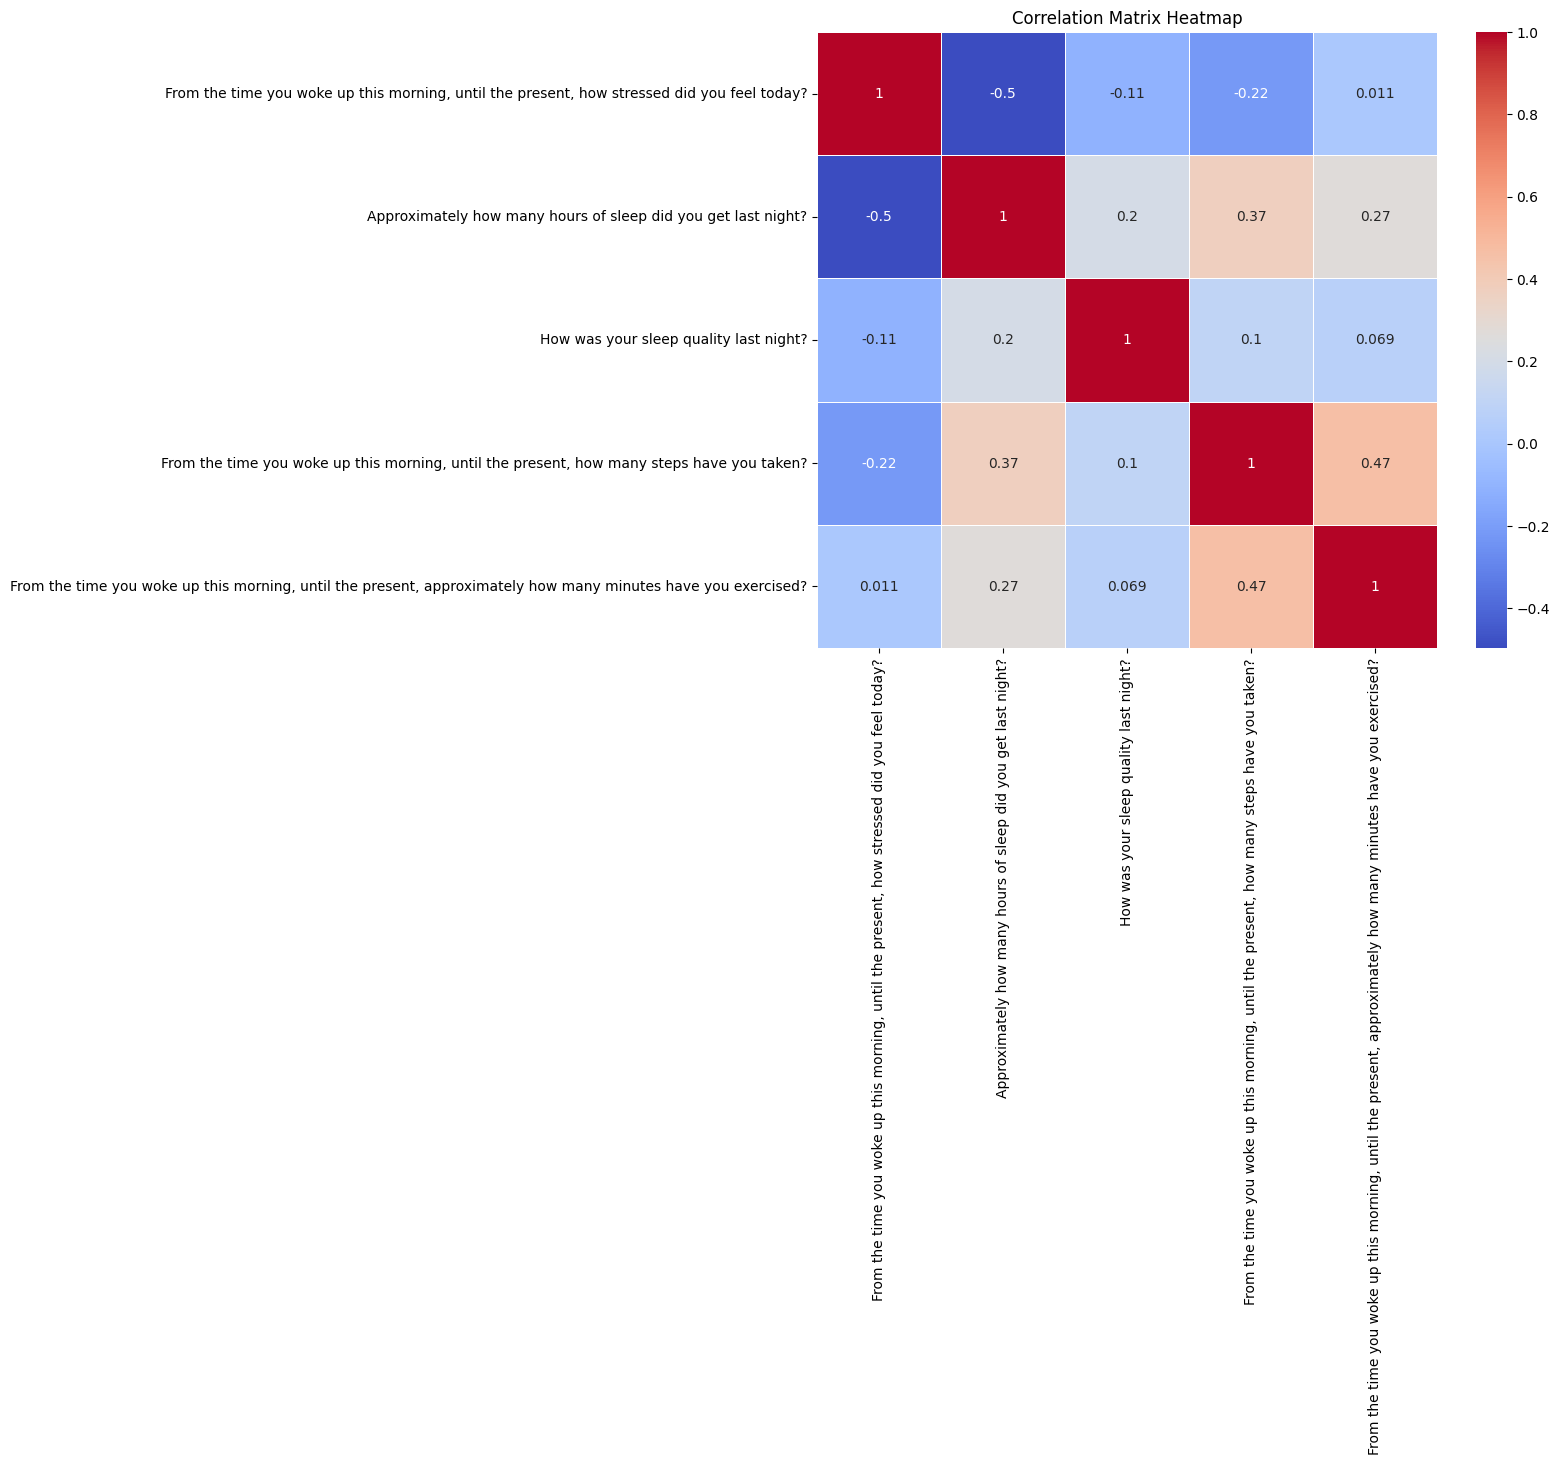

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
attribute_data['SleepAnalysis']


,startDate,endDate,category,pid
0,2023-09-01 05:06:49,2023-09-01 08:30:00.253696000,0.0,1
1,2023-09-14 07:42:50,2023-09-14 08:30:00.696614144,0.0,1
2,2023-08-29 06:24:54,2023-08-29 06:24:57.000000000,0.0,1
3,2023-09-08 06:07:31,2023-09-08 06:07:35.000000000,0.0,1
4,2023-08-31 05:43:37,2023-08-31 08:30:00.667395072,0.0,1
...,...,...,...,...
1965,2023-09-16 11:20:13,2023-09-16 11:20:20.000000000,0.0,18
1966,2023-08-30 03:46:55,2023-08-30 10:30:22.285127168,0.0,18
1967,2023-09-05 02:55:33,2023-09-05 03:05:57.000000000,0.0,18
1968,2023-09-17 11:37:27,2023-09-17 12:00:00.363315968,0.0,18


In [ ]:
grouped_survey_18 = grouped_df_survey.get_group("18")
grouped_phone_18 = grouped_df_phone.get_group("18")
grouped_survey_11 = grouped_df_survey.get_group("11")
grouped_phone_11 = grouped_df_phone.get_group("11")
grouped_survey_15 = grouped_df_survey.get_group("15")
grouped_phone_15 = grouped_df_phone.get_group("15")
grouped_survey_16 = grouped_df_survey.get_group("16")
grouped_phone_16 = grouped_df_phone.get_group("16")
date_columns_phone = ['startDate','endDate']
date_columns_survey = ['Timestamp']

for col in date_columns_phone:
   grouped_phone_18[col] = pd.to_datetime(grouped_phone_18[col]).dt.date
   grouped_phone_11[col] = pd.to_datetime(grouped_phone_11[col]).dt.date
   grouped_phone_15[col] = pd.to_datetime(grouped_phone_15[col]).dt.date
   grouped_phone_16[col] = pd.to_datetime(grouped_phone_16[col]).dt.date



for col in date_columns_survey:
    grouped_survey_18[col] = pd.to_datetime(grouped_survey_18[col]).dt.date
    grouped_survey_11[col] = pd.to_datetime(grouped_survey_11[col]).dt.date
    grouped_survey_15[col] = pd.to_datetime(grouped_survey_15[col]).dt.date
    grouped_survey_16[col] = pd.to_datetime(grouped_survey_16[col]).dt.date



grouped_survey_18.head()
#grouped_phone_18

<ipython-input-26-3f0306b26f45>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-26-3f0306b26f45>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-26-3f0306b26f45>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-26-3f03

,Timestamp,What is your participant ID?,"From the time you woke up this morning, until the present, how stressed did you feel today?",Approximately how many hours of sleep did you get last night?,How was your sleep quality last night?,"From the time you woke up this morning, until the present, how many steps have you taken?","From the time you woke up this morning, until the present, approximately how many minutes have you exercised?"
1,2023-08-28,18,3,6.0,3,19187.0,60.0
2,2023-08-29,18,2,8.5,5,20205.0,171.0
3,2023-08-30,18,2,7.0,3,23553.0,139.0
6,2023-09-01,18,3,8.5,4,15000.0,60.0
11,2023-09-03,18,3,8.0,1,9016.0,189.0


In [ ]:
grouped_survey_18 = grouped_df_survey.get_group("18")
grouped_phone_18 = grouped_df_phone.get_group("18")
grouped_survey_11 = grouped_df_survey.get_group("11")
grouped_phone_11 = grouped_df_phone.get_group("11")
grouped_survey_15 = grouped_df_survey.get_group("15")
grouped_phone_15 = grouped_df_phone.get_group("15")
grouped_survey_16 = grouped_df_survey.get_group("16")
grouped_phone_16 = grouped_df_phone.get_group("16")
date_columns_phone = ['startDate','endDate']
date_columns_survey = ['Timestamp']

for col in date_columns_phone:
   grouped_phone_18[col] = pd.to_datetime(grouped_phone_18[col]).dt.date
   grouped_phone_11[col] = pd.to_datetime(grouped_phone_11[col]).dt.date
   grouped_phone_15[col] = pd.to_datetime(grouped_phone_15[col]).dt.date
   grouped_phone_16[col] = pd.to_datetime(grouped_phone_16[col]).dt.date



for col in date_columns_survey:
    grouped_survey_18[col] = pd.to_datetime(grouped_survey_18[col]).dt.date
    grouped_survey_11[col] = pd.to_datetime(grouped_survey_11[col]).dt.date
    grouped_survey_15[col] = pd.to_datetime(grouped_survey_15[col]).dt.date
    grouped_survey_16[col] = pd.to_datetime(grouped_survey_16[col]).dt.date



grouped_survey_18.head()
#grouped_phone_18
grouped_phone_18.rename(columns={'startDate': 'Timestamp'}, inplace=True)
grouped_phone_11.rename(columns={'startDate': 'Timestamp'}, inplace=True)
grouped_phone_15.rename(columns={'startDate': 'Timestamp'}, inplace=True)
grouped_phone_16.rename(columns={'startDate': 'Timestamp'}, inplace=True)

combined_df_18 = grouped_phone_18.merge(grouped_survey_18, on='Timestamp', how='outer')
combined_df_11 = grouped_phone_11.merge(grouped_survey_11, on='Timestamp', how='outer')
combined_df_15 = grouped_phone_15.merge(grouped_survey_15, on='Timestamp', how='outer')
combined_df_16 = grouped_phone_16.merge(grouped_survey_16, on='Timestamp', how='outer')

combined_df = pd.concat([combined_df_18, combined_df_11, combined_df_15, combined_df_16], axis=0)
combined_df.head()

<ipython-input-27-8dd062ae51a1>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-8dd062ae51a1>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-8dd062ae51a1>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-8dd0

,Timestamp,endDate,category,pid,What is your participant ID?,"From the time you woke up this morning, until the present, how stressed did you feel today?",Approximately how many hours of sleep did you get last night?,How was your sleep quality last night?,"From the time you woke up this morning, until the present, how many steps have you taken?","From the time you woke up this morning, until the present, approximately how many minutes have you exercised?"
0,2023-09-09,2023-09-09,0.0,18,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-09-09,2023-09-09,0.0,18,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-09-09,2023-09-09,0.0,18,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-08-25,2023-08-25,0.0,18,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-08-25,2023-08-25,0.0,18,NaN,NaN,NaN,NaN,NaN,NaN


Stress level univariate analysis

In [ ]:
combined_phone_data=combined_df
combined_phone_data.head()

,Timestamp,endDate,category,pid,What is your participant ID?,"From the time you woke up this morning, until the present, how stressed did you feel today?",Approximately how many hours of sleep did you get last night?,How was your sleep quality last night?,"From the time you woke up this morning, until the present, how many steps have you taken?","From the time you woke up this morning, until the present, approximately how many minutes have you exercised?"
0,2023-09-09,2023-09-09,0.0,18,NaN,2.0,NaN,2.0,NaN,NaN
1,2023-09-09,2023-09-09,0.0,18,NaN,2.0,NaN,2.0,NaN,NaN
2,2023-09-09,2023-09-09,0.0,18,NaN,2.0,NaN,2.0,NaN,NaN
3,2023-08-25,2023-08-25,0.0,18,NaN,2.0,NaN,2.0,NaN,NaN
4,2023-08-25,2023-08-25,0.0,18,NaN,2.0,NaN,2.0,NaN,NaN


In [ ]:
value_counts = combined_phone_data.iloc[:,5].value_counts()

# Access the categories (keys)
counts_dict = value_counts.to_dict()
counts_dict
counts_list = value_counts.values.tolist()
counts_name = value_counts.index.tolist()
combined_phone_data.iloc[:,5].fillna(counts_name[0], inplace=True)

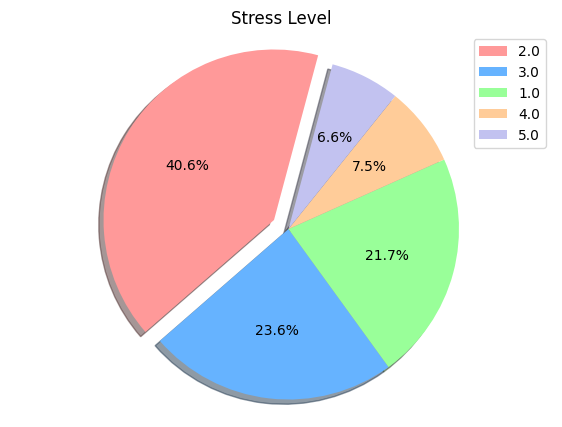

In [ ]:
fig1, ax1=plt.subplots(figsize=(7,5))
explode=(0.1,0,0,0,0)
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
ax1.pie(counts_list, explode=explode, autopct='%1.1f%%', shadow=True,startangle=75, colors=colors)
ax1.axis('equal')      ##equal aspect ratio makes sure that the pie is drawn a circle
ax1.legend(labels=counts_name)
plt.title("Stress Level")
plt.show()

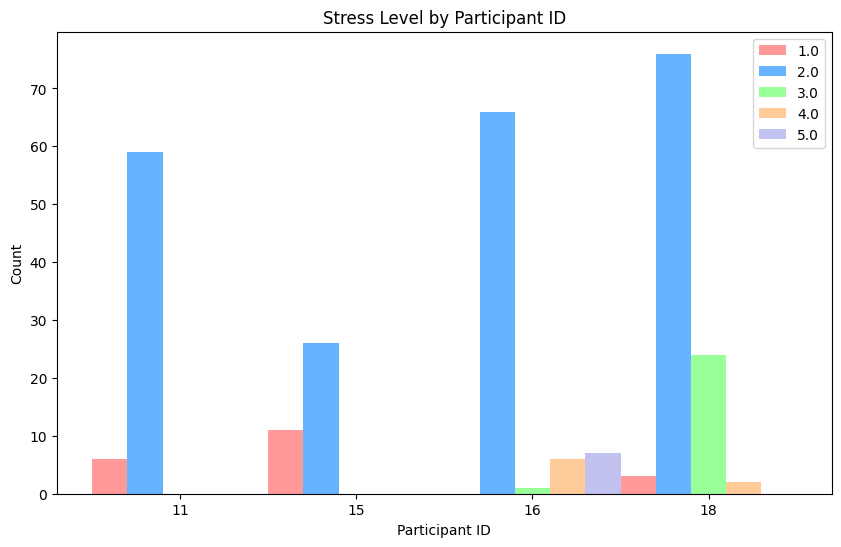

In [ ]:
from pandas.core.arrays.datetimelike import Timestamp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data = {'pid': combined_phone_data['pid'],
        'date': combined_phone_data['Timestamp'],
        'stress_level_category': combined_phone_data.iloc[:,5]}
sleep_data = pd.DataFrame(data)

# Group the data by participant ID and sleep quality category
grouped_data = sleep_data.groupby(['pid', 'stress_level_category']).size().unstack(fill_value=0)

# Define the sleep quality colors
categories = grouped_data.columns
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']  # You can customize the colors as needed

# Create the grouped bar chart
plt.figure(figsize=(10, 6))

bar_width = 0.2  # Width of each bar
index = np.arange(len(grouped_data))  # X-axis positions for each participant

for i, category in enumerate(categories):
    plt.bar(index + i * bar_width, grouped_data[category], bar_width, label=category, color=colors[i])

plt.xlabel('Participant ID')
plt.ylabel('Count')
plt.title('Stress Level by Participant ID')
plt.xticks(index + bar_width * (len(categories) - 1) / 2, grouped_data.index)
plt.legend()

# Show the grouped bar chart
plt.show()


Sleep Quality univariate analysis

In [ ]:
combined_phone_data.iloc[:,7].fillna(counts_name[0], inplace=True)
value_counts = combined_phone_data.iloc[:,7].value_counts()

# Access the categories (keys)
counts_dict = value_counts.to_dict()
counts_dict
counts_list = value_counts.values.tolist()
counts_name = value_counts.index.tolist()


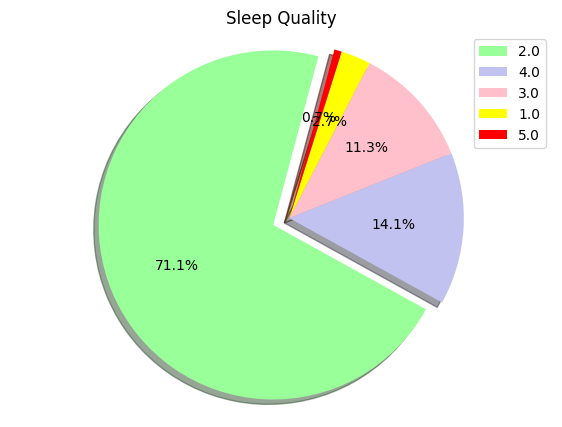

In [ ]:
fig1, ax1=plt.subplots(figsize=(7,5))
explode=(0.1,0,0,0,0)

colors = ['#99ff99','#c2c2f0','pink', 'yellow',  'red']
ax1.pie(counts_list, explode=explode, autopct='%1.1f%%', shadow=True,startangle=75, colors=colors)
ax1.axis('equal')      ##equal aspect ratio makes sure that the pie is drawn a circle
ax1.legend(labels=counts_name)
plt.title("Sleep Quality")
plt.show()

In [ ]:
import plotly.express as px
fig = px.pie(names=counts_name, values=counts_list, title="Sleep Quality")

# Customize the appearance of the pie chart
fig.update_traces(
    hoverinfo='label+percent',  # Show label and percentage on hover
    pull=[0.1,0,0,0,0],  # Explode the first slice (Category A)
    #textinfo='none'  # Hide category names on the chart
)

# Show the legend
fig.update_layout(showlegend=True)

# Display the pie chart
fig.show()

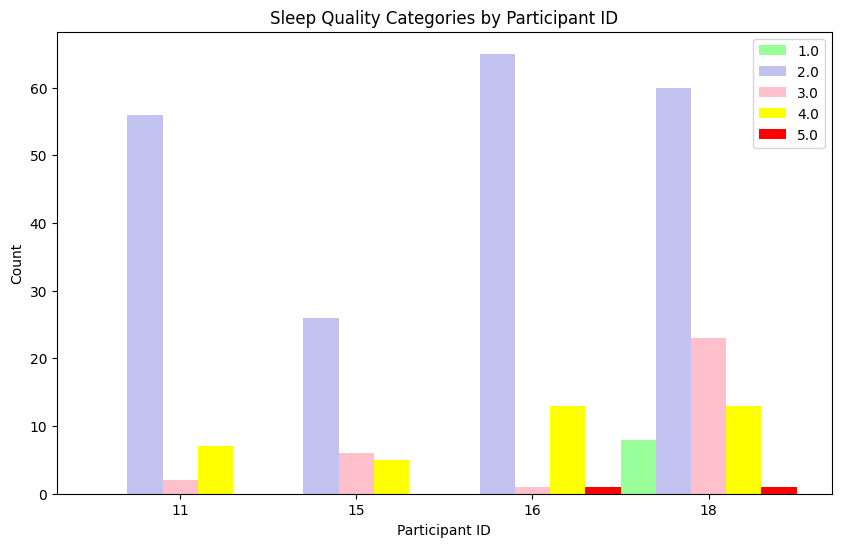

In [ ]:
from pandas.core.arrays.datetimelike import Timestamp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace this with your actual sleep data)
data = {'pid': combined_phone_data['pid'],
        'date': combined_phone_data['Timestamp'],
        'sleep_quality_category': combined_phone_data.iloc[:,7]}
sleep_data = pd.DataFrame(data)

# Group the data by participant ID and sleep quality category
grouped_data = sleep_data.groupby(['pid', 'sleep_quality_category']).size().unstack(fill_value=0)

# Define the sleep quality categories and their colors
categories = grouped_data.columns
colors = ['#99ff99','#c2c2f0','pink', 'yellow',  'red']  # You can customize the colors as needed

# Create the grouped bar chart
plt.figure(figsize=(10, 6))

bar_width = 0.2  # Width of each bar
index = np.arange(len(grouped_data))  # X-axis positions for each participant

for i, category in enumerate(categories):
    plt.bar(index + i * bar_width, grouped_data[category], bar_width, label=category, color=colors[i])

plt.xlabel('Participant ID')
plt.ylabel('Count')
plt.title('Sleep Quality Categories by Participant ID')
plt.xticks(index + bar_width * (len(categories) - 1) / 2, grouped_data.index)
plt.legend()

# Show the grouped bar chart
plt.show()


<ipython-input-41-5e1c4cd627dc>:11: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




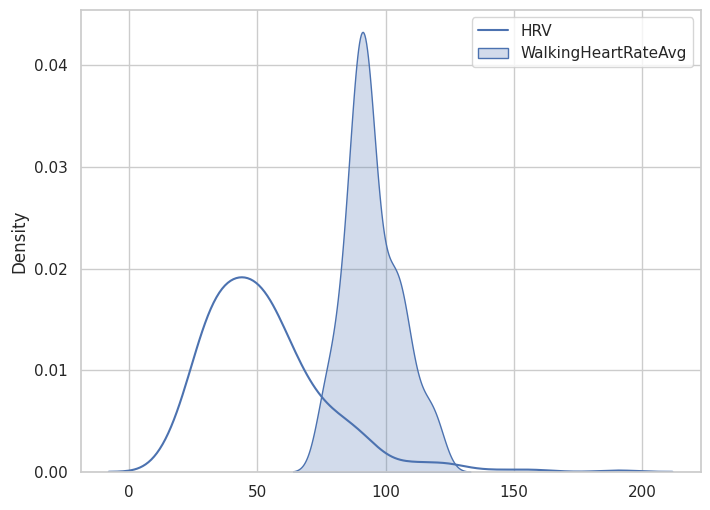

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'data' and 'attribute_name' with your actual DataFrame and attribute name
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Example density plot for a single attribute
sns.kdeplot(attribute_data['HeartRateVariabilitySDNN'], color="o", label='HRV')

sns.kdeplot(attribute_data['WalkingHeartRateAverage'], shade=True, color="b", label ='WalkingHeartRateAvg')
#plt.xlabel('SleepAnalysised_df')
#plt.ylabel('Density')
#plt.title('Density Plot of a Single Attribute')
plt.legend()
plt.show()

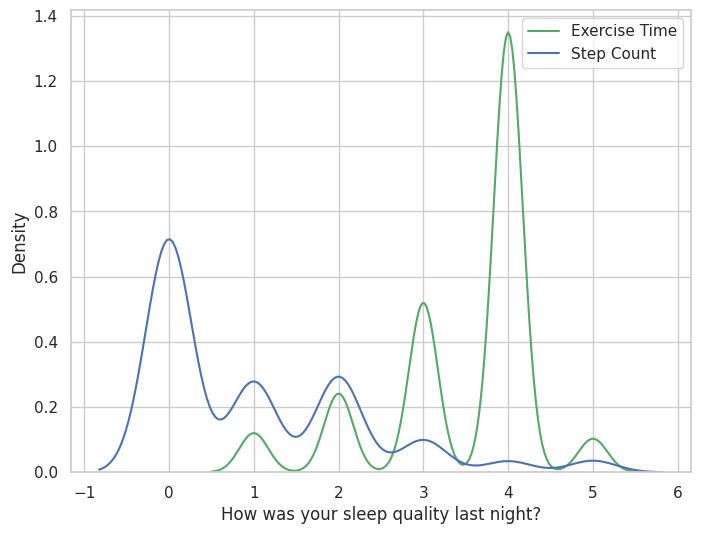

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.kdeplot(combined_df['How was your sleep quality last night?'], label='Exercise Time',color="g")
sns.kdeplot(attribute_data['SleepAnalysis'], label='Step Count',color="b")
#plt.figure(figsize=(10, 6))

# Example density plot for a single attribute
#plt.xlabel('SleepAnalysis')
#plt.ylabel('Density')
plt.legend()

#plt.title('Density Plot of a Single Attribute')
plt.show()

In [ ]:
correlations = combined_df.corr()['From the time you woke up this morning, until the present, how stressed did you feel today?']
print(correlations)
#correlations = combined_df.corr()['From the time you woke up this morning, until the present, how stressed did you feel today?']


quantity (count)                                                                                                -0.023270
From the time you woke up this morning, until the present, how stressed did you feel today?                      1.000000
Approximately how many hours of sleep did you get last night?                                                   -0.463455
How was your sleep quality last night?                                                                          -0.089672
From the time you woke up this morning, until the present, how many steps have you taken?                       -0.245594
From the time you woke up this morning, until the present, approximately how many minutes have you exercised?    0.103714
Name: From the time you woke up this morning, until the present, how stressed did you feel today?, dtype: float64


<ipython-input-38-5d39b0dec4e7>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Aryan

Yiheng

In [ ]:
def z_score_scaling(data):
    mean_val = np.mean(data)
    std_dev = np.std(data)
    standardized_data = [(x - mean_val) / std_dev for x in data]
    return standardized_data


In [ ]:
import scipy.stats as stats
def chi_square_test(observed, expected):
    """
    Perform a chi-square test of independence.

    Parameters:
    - observed: A 2D array or matrix containing the observed frequencies.

    Returns:
    - chi2_statistic: The chi-square test statistic.
    - p_value: The p-value associated with the test.
    - degrees_of_freedom: The degrees of freedom for the test.
    """
    # Perform the chi-square test
    chi2_statistic, p_value = stats.chisquare(f_obs=observed, f_exp=expected, axis=None)

    # Calculate degrees of freedom
    degrees_of_freedom = (observed.shape[0] - 1) * (observed.shape[1] - 1)

    return chi2_statistic, p_value, degrees_of_freedom

In [ ]:
def t_test(sample1, sample2, equal_var=True):
    """
    Perform an independent two-sample t-test.

    Parameters:
    - sample1: A list or array containing the data of the first sample.
    - sample2: A list or array containing the data of the second sample.
    - equal_var: (Optional) Whether to assume equal variance (True by default).

    Returns:
    - t_statistic: The t-statistic of the test.
    - p_value: The p-value associated with the test.
    """
    sample1 = z_score_scaling(sample1)
    sample2 = z_score_scaling(sample2)
    t_statistic, p_value = stats.ttest_ind(sample1, sample2, equal_var=equal_var)
    return t_statistic, p_value

In [ ]:
t_test(df['How was your sleep quality last night?'],df['From the time you woke up this morning, until the present, how stressed did you feel today?'])

(-1.4911819056239848e-15, 0.9999999999999989)

In [ ]:
df_low_score = df[df['From the time you woke up this morning, until the present, how stressed did you feel today?'] < 2]
df_high_score = df[df['From the time you woke up this morning, until the present, how stressed did you feel today?'] >=2]

In [ ]:
attribute_columns = df.columns
numeric_df = df.select_dtypes(include=['number'])
numeric_df.drop(columns='From the time you woke up this morning, until the present, how stressed did you feel today?', inplace=True)
# Get the list of numeric attribute column names
numeric_attribute_columns = numeric_df.columns
# Iterate over every pair of attributes and perform t-tests
for i in range(len(numeric_attribute_columns)):
    attribute1_name = numeric_attribute_columns[i]
    t_statistic, p_value = t_test(df_low_score[attribute1_name], df_high_score[attribute1_name])
    if p_value < 0.05:
        print("There is a significant difference for the attributes "+attribute1_name)
    else:
        print("There is no significant difference for the attributes "+attribute1_name)

There is no significant difference for the attributes Approximately how many hours of sleep did you get last night?
There is no significant difference for the attributes How was your sleep quality last night?
There is no significant difference for the attributes From the time you woke up this morning, until the present, how many steps have you taken?
There is no significant difference for the attributes From the time you woke up this morning, until the present, approximately how many minutes have you exercised?


In [ ]:
for i in range(len(numeric_attribute_columns)):
    for j in range(i + 1, len(numeric_attribute_columns)):
        attribute1_name = numeric_attribute_columns[i]
        attribute2_name = numeric_attribute_columns[j]
        a = z_score_scaling(df[attribute1_name])
        b = z_score_scaling(df[attribute2_name])
        contingency_table = pd.crosstab(a, b)
        chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
        if p_value < 0.05:
          print("There is a significant association between "+attribute1_name +" and "+attribute2_name)
        else:
          print("There is no significant association between " +attribute1_name +" and "+attribute2_name)

There is no significant association between From the time you woke up this morning, until the present, how stressed did you feel today? and Approximately how many hours of sleep did you get last night?
There is no significant association between From the time you woke up this morning, until the present, how stressed did you feel today? and How was your sleep quality last night?
There is no significant association between From the time you woke up this morning, until the present, how stressed did you feel today? and From the time you woke up this morning, until the present, how many steps have you taken?
There is no significant association between From the time you woke up this morning, until the present, how stressed did you feel today? and From the time you woke up this morning, until the present, approximately how many minutes have you exercised?
There is no significant association between Approximately how many hours of sleep did you get last night? and How was your sleep quality la

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

def mice_impute_column(data, column_to_impute, num_iterations=10):
    imputed_data = data.copy()

    for i in range(num_iterations):
        mask = imputed_data[column_to_impute].isnull()
        features = imputed_data.columns[~imputed_data.columns.isin([column_to_impute])]
        imputer = IterativeImputer(max_iter=1, random_state=i)
        imputed_values = imputer.fit_transform(imputed_data[features])
        imputed_data.loc[mask, column_to_impute] = imputed_values[mask, features.tolist().index(column_to_impute)]

    return imputed_data

Harshini

Line Chart

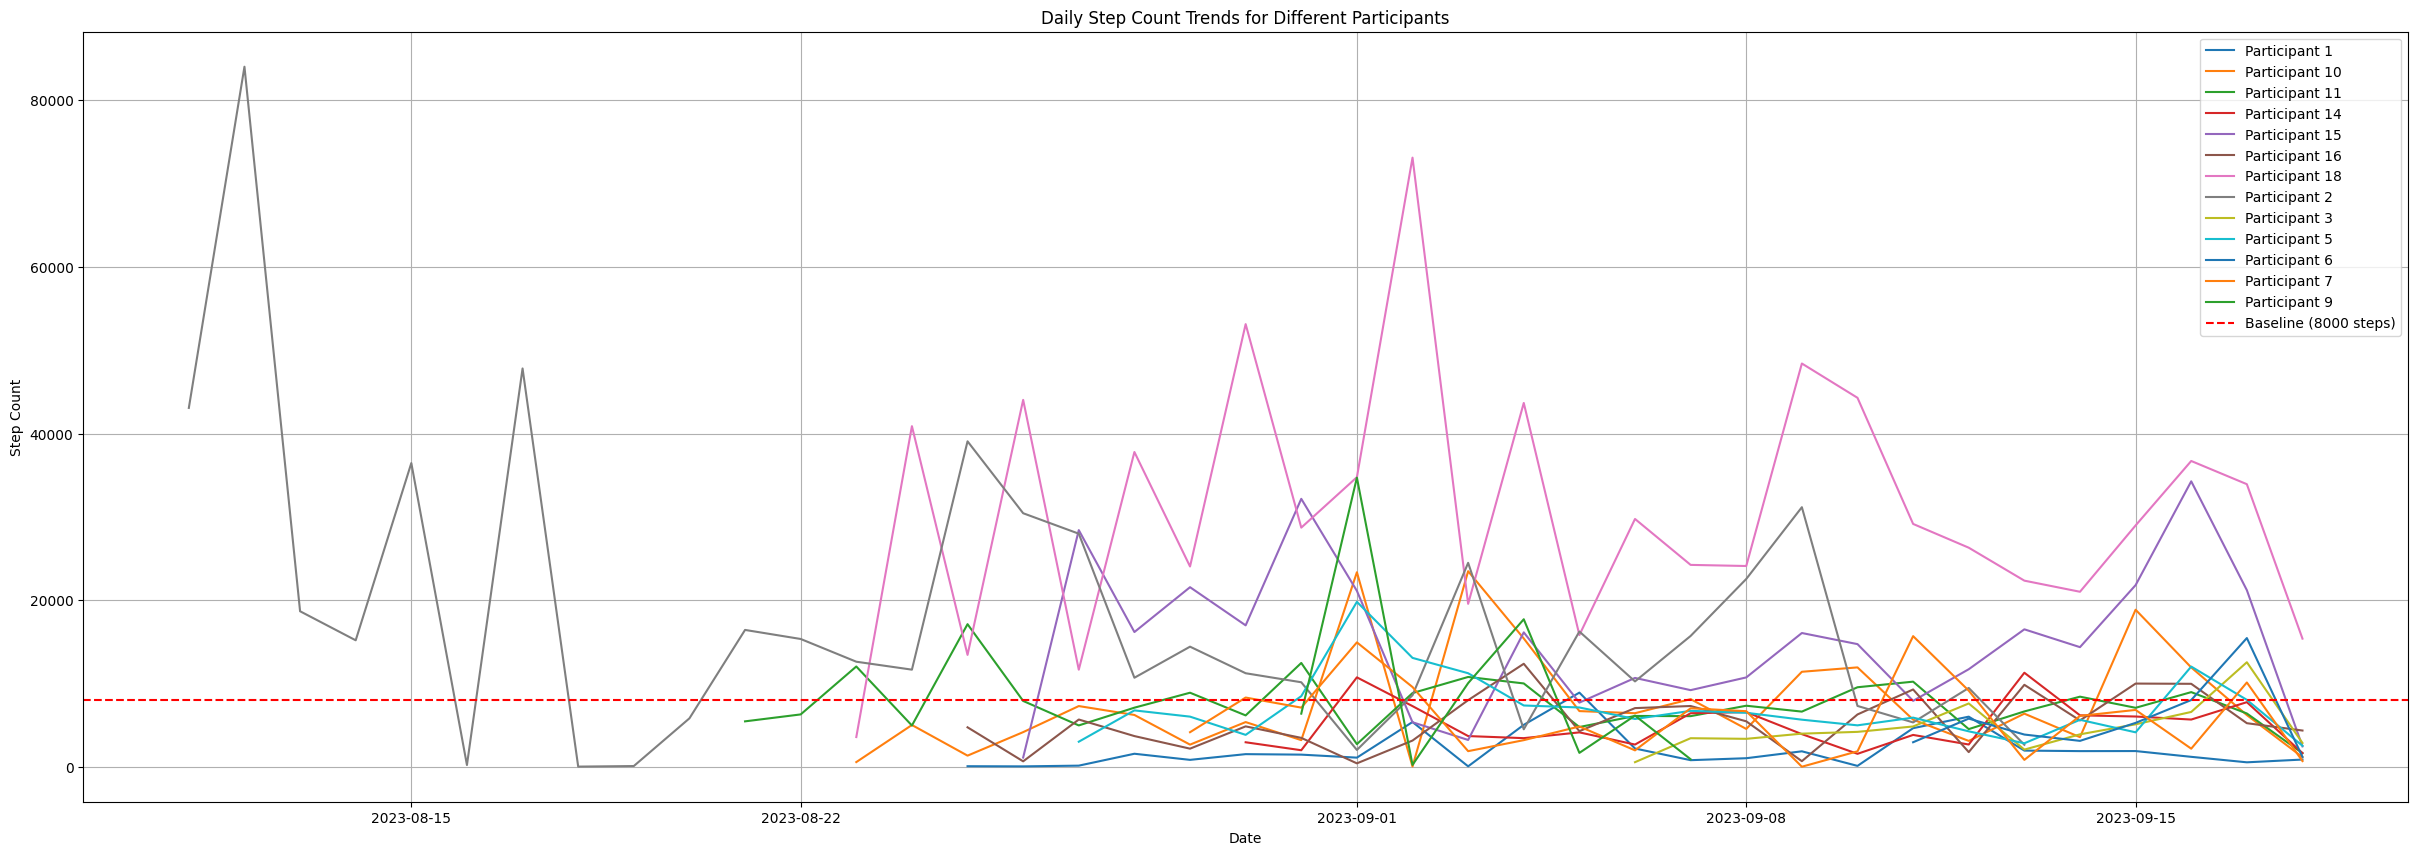

In [ ]:
import matplotlib.pyplot as plt


# Assuming 'StepCount' is the attribute containing step count data
step_count_data = attribute_data.get('StepCount', None)

if step_count_data is not None:
    # Group the data by participant (pid)
    grouped_data = step_count_data.groupby('pid')

step_count_data['startDate'] = pd.to_datetime(step_count_data['startDate'])
step_count_data['date'] = step_count_data['startDate'].dt.date

# Group by participant and date, sum the step count for each day
daily_step_count_per_participant = step_count_data.groupby(['pid', 'date'])['quantity (count)'].sum()

# Plot the daily step count for each participant
plt.figure(figsize=(30, 10))

# Iterate through each participant and plot their step count
for participant_id in daily_step_count_per_participant.index.get_level_values('pid').unique():
    participant_data = daily_step_count_per_participant.loc[participant_id]
    plt.plot(participant_data.index, participant_data, label=f'Participant {participant_id}')

# Add a baseline line at 8000
plt.axhline(y=8000, color='r', linestyle='--', label='Baseline (8000 steps)')

plt.xlabel('Date')
plt.ylabel('Step Count')
plt.title('Daily Step Count Trends for Different Participants')
plt.legend()
plt.grid(True)
plt.show()






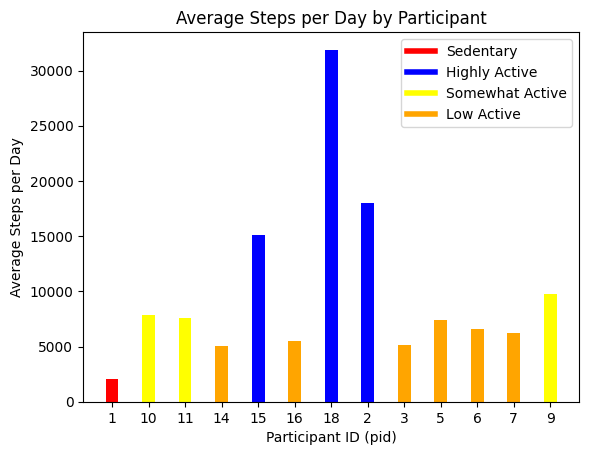

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Combine data for all participants
combined_df = pd.concat([df for attribute_name, df in attribute_data.items() if attribute_name == 'StepCount'])

# Calculate average steps per day for all participants
avg_steps = combined_df.groupby('pid')['quantity (count)'].sum() / ((combined_df.groupby('pid')['endDate'].max() - combined_df.groupby('pid')['startDate'].min()).dt.days + 1)

# Sort the data by 'pid'
avg_steps = avg_steps.sort_index()

# Classify participants based on average steps per day
categories = []
for avg_step in avg_steps:
    if avg_step < 5000:
        categories.append('Sedentary')
    elif 5000 <= avg_step < 7500:
        categories.append('Low Active')
    elif 7500 <= avg_step < 10000:
        categories.append('Somewhat Active')
    elif avg_step >= 10000 and avg_step <= 12500:
        categories.append('Active')
    elif avg_step > 12500:
        categories.append('Highly Active')

# Prepare data for plotting
participant_ids = avg_steps.index  # Use 'pid' as participant IDs
avg_steps = avg_steps.values  # Convert to numpy array for easier plotting

# Plot the grouped bar chart with custom legend
fig, ax = plt.subplots()
bar_width = 0.35
bar_colors = {'Sedentary': 'red', 'Low Active': 'orange', 'Somewhat Active': 'yellow',
              'Active': 'green', 'Highly Active': 'blue'}

bars = ax.bar(participant_ids, avg_steps, bar_width, label='Average Steps per Day', color=[bar_colors[cat] for cat in categories])

# Create a custom legend
legend_handles = [plt.Line2D([0], [0], color=bar_colors[cat], lw=4, label=cat) for cat in set(categories)]
ax.legend(handles=legend_handles)

ax.set_xlabel('Participant ID (pid)')
ax.set_ylabel('Average Steps per Day')
ax.set_title('Average Steps per Day by Participant')
ax.set_xticks(participant_ids)
ax.set_xticklabels(participant_ids)

plt.show()


In [ ]:
step_count_df = attribute_data["StepCount"].rename(columns={'quantity (count)': 'quantity'})

In [ ]:
flights_climbed_df = attribute_data["FlightsClimbed"].rename(columns={'quantity (count)': 'quantity'})

In [ ]:
exercise_time_df = attribute_data["AppleExerciseTime"].rename(columns={'quantity (min)': 'quantity'})

In [ ]:
walking_speed_df = attribute_data["WalkingSpeed"].rename(columns={'quantity (m/s)': 'quantity'})

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


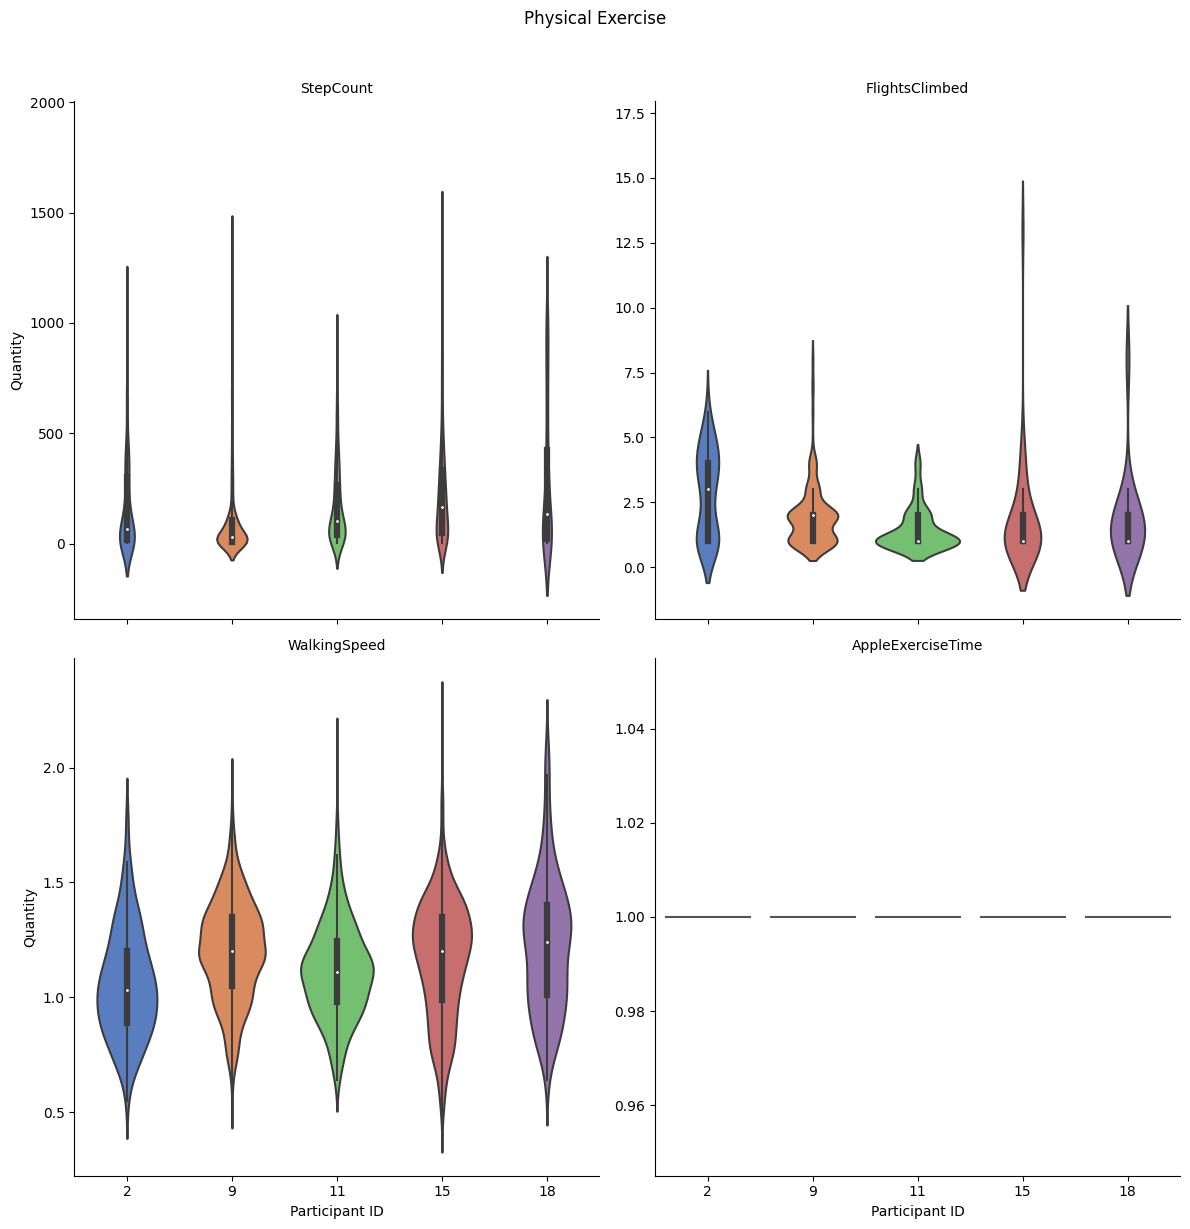

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace with your actual data loading)
# Assume you have a list of DataFrames, each corresponding to an attribute
# Here, we'll use a dictionary to mimic this structure
# Replace this with your actual data
attribute_data = {
    'StepCount': step_count_df,  # DataFrame for StepCount attribute
    'FlightsClimbed': flights_climbed_df,  # DataFrame for FlightsClimbed attribute
    'WalkingSpeed': walking_speed_df,  # DataFrame for WalkingSpeed attribute
    'AppleExerciseTime': exercise_time_df  # DataFrame for ExerciseTime attribute
}

# Select specific attributes for the violin plot
selected_attributes = ['StepCount', 'FlightsClimbed', 'WalkingSpeed', 'AppleExerciseTime']

# Create an empty list to hold the DataFrames for each attribute
combined_data = []

# Iterate through selected attributes and extract the relevant data
for attribute in selected_attributes:
    if attribute in attribute_data:
        df = attribute_data[attribute]
        df = df.rename(columns={'quantity (count)': 'quantity', 'quantity (m/s)': 'quantity', 'quantity (min)': 'quantity'})
        df['Attribute'] = attribute
        combined_data.append(df)

# Concatenate the data into a single DataFrame
combined_data = pd.concat(combined_data)

# Plot a violin plot with facets for each attribute
g = sns.FacetGrid(combined_data, col='Attribute', col_wrap=2, height=6, sharey=False)
g.map(sns.violinplot, 'pid', 'quantity', palette='muted')
g.set_titles(col_template="{col_name}")
g.set_axis_labels('Participant ID', 'Quantity')
g.fig.suptitle('Physical Exercise', y=1.02)  # Overall heading
plt.tight_layout()
plt.show()





In [ ]:
walking_steadiness_df = attribute_data["AppleWalkingSteadiness"].rename(columns={'quantity (%)': 'quantity'})


In [ ]:
Resting_hr_df = attribute_data["RestingHeartRate"].rename(columns={'quantity (count/min)': 'quantity'})

In [ ]:
walking_hr_avg_df = attribute_data["WalkingHeartRateAverage"].rename(columns={'quantity (count/min)': 'quantity'})


In [ ]:
HRV_df = attribute_data["HeartRateVariabilitySDNN"].rename(columns={'quantity (ms)': 'quantity'})

In [ ]:
stand_df = attribute_data["AppleStandTime"].rename(columns={'quantity (min)': 'quantity'})

In [ ]:
Respiratory_df = attribute_data["RespiratoryRate"].rename(columns={'quantity (count/min)': 'quantity'})

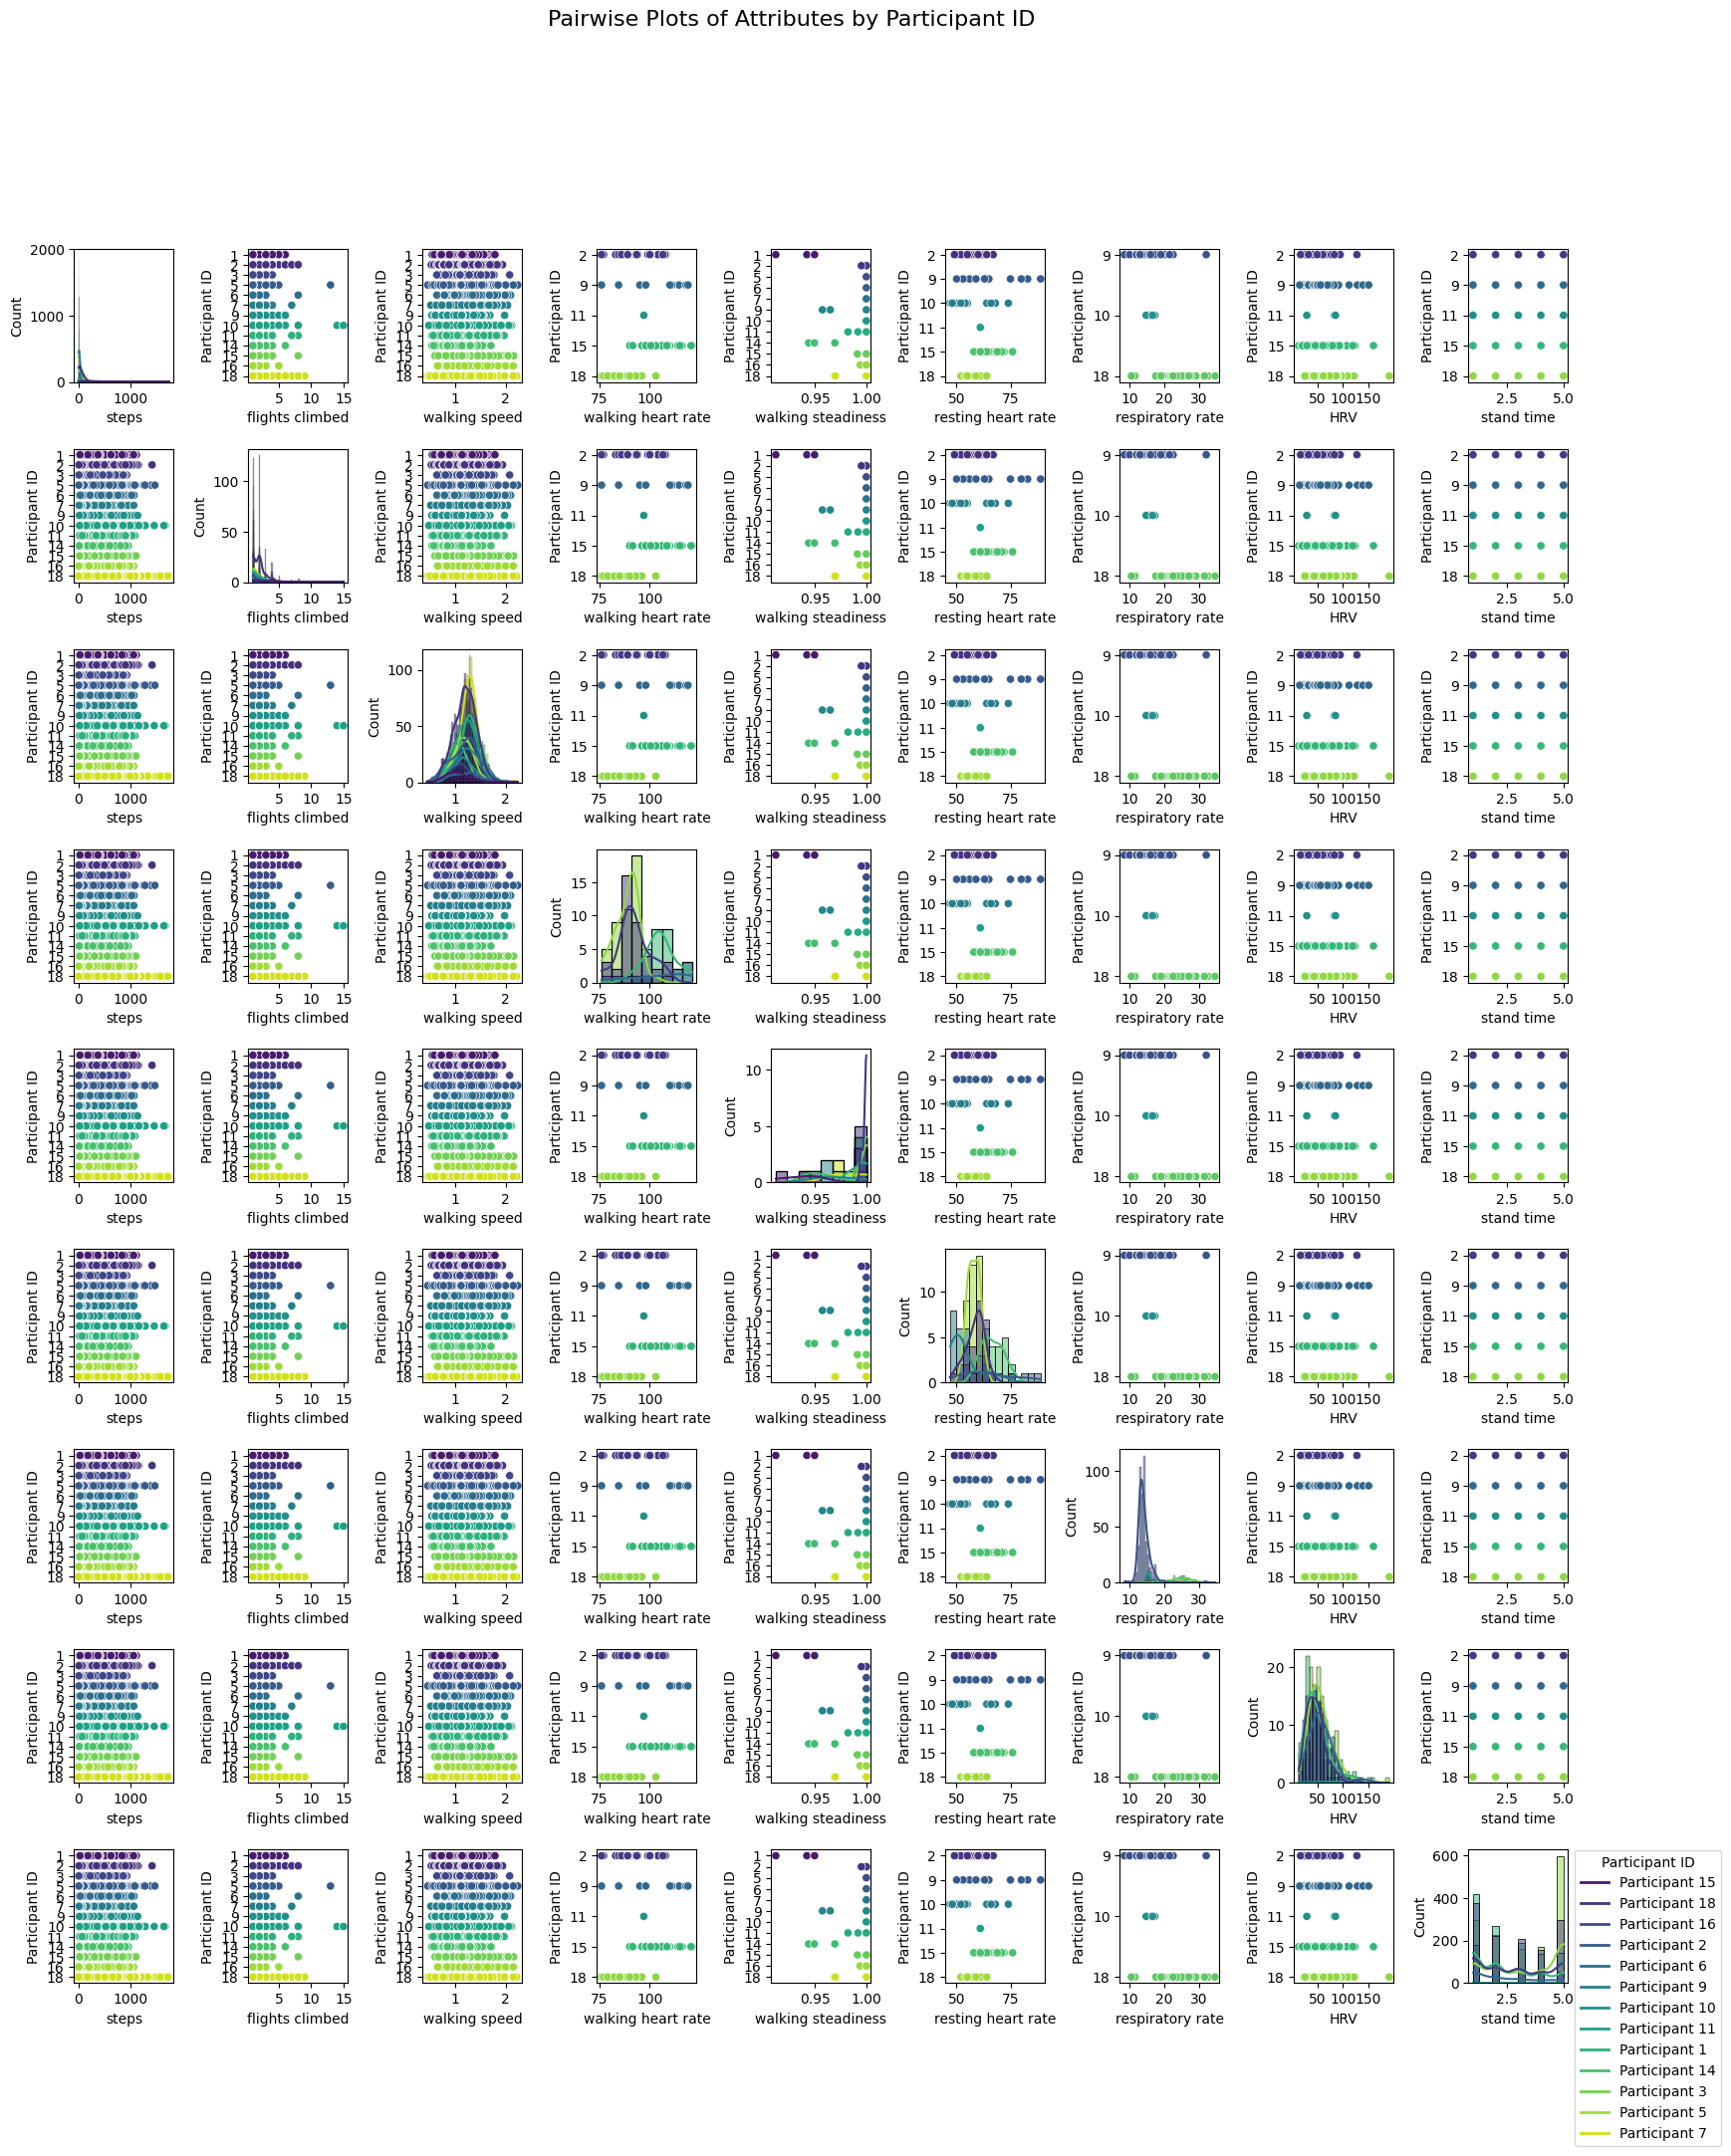

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

# List of dataframes, each containing a single attribute
dataframes = [step_count_df, flights_climbed_df, walking_speed_df, walking_hr_avg_df, walking_steadiness_df, Resting_hr_df, Respiratory_df, HRV_df, stand_df]

# List of attribute names for labeling plots
attributes = ['steps', 'flights climbed', 'walking speed', 'walking heart rate', 'walking steadiness', 'resting heart rate', 'respiratory rate', 'HRV', 'stand time']
# Create a grid layout for the plots
num_attributes = len(dataframes)
fig, axes = plt.subplots(nrows=num_attributes, ncols=num_attributes, figsize=(16, 20))

# Iterate through all combinations of attributes
for i, j in product(range(num_attributes), repeat=2):
    if i == j:
        # Plot distribution on the diagonal for each attribute
        sns.histplot(data=dataframes[i], x='quantity', kde=True, hue='pid', ax=axes[i, j], palette='viridis', legend=False)
        axes[i, j].set_xlabel(attributes[i])
        axes[i, j].set_ylabel('Count')
    else:
        # Scatter plot for non-diagonal elements
        sns.scatterplot(data=dataframes[j], x='quantity', y='pid', hue='pid', ax=axes[i, j], palette='viridis', legend=False)
        axes[i, j].set_xlabel(attributes[j])
        axes[i, j].set_ylabel('Participant ID')

# Adjust layout and add a legend
plt.tight_layout()
plt.subplots_adjust(top=0.9, hspace=0.5)  # Adjust top and vertical space

# Get all unique participant IDs
all_participant_ids = []
for df in dataframes:
    all_participant_ids.extend(df['pid'].unique())

# Get unique participant IDs and corresponding colors
unique_participant_ids = list(set(all_participant_ids))
unique_colors = sns.color_palette('viridis', n_colors=len(unique_participant_ids))

# Create a custom legend with unique participant IDs and colors
legend_labels = {pid: f'Participant {pid}' for pid in unique_participant_ids}
legend_colors = {pid: color for pid, color in zip(unique_participant_ids, unique_colors)}

handles = [plt.Line2D([0], [0], color=legend_colors[pid], lw=2) for pid in unique_participant_ids]
labels = [legend_labels[pid] for pid in unique_participant_ids]

# Move the legend a little towards the white space
plt.legend(handles=handles, labels=labels, title='Participant ID', loc='upper left', bbox_to_anchor=(1.0, 1.05))

# Add a main title for the entire grid
plt.suptitle('Pairwise Plots of Attributes by Participant ID', fontsize=16, y=1.02)  # Adjust y position for title
plt.show()






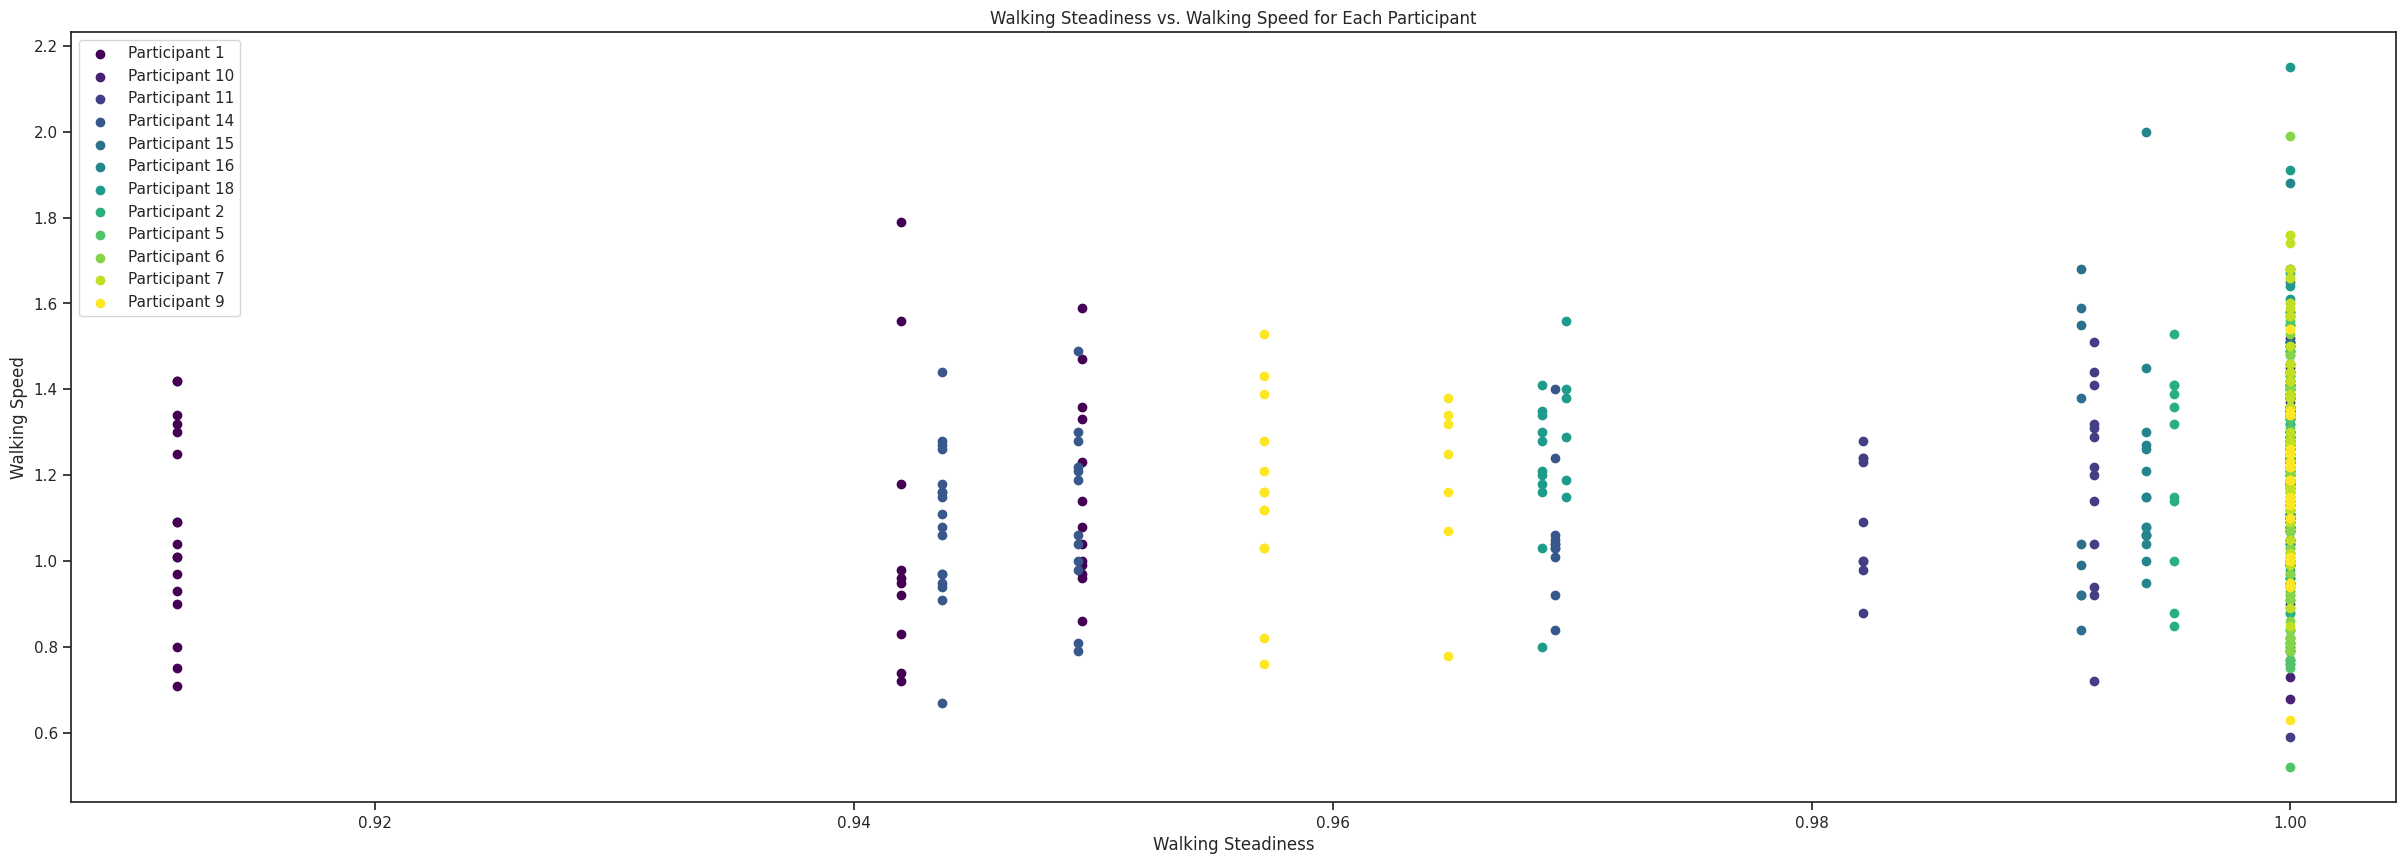

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the data frames for 'Walking steadiness' and 'Walking speed'
walking_steadiness_df = attribute_data.get('AppleWalkingSteadiness', None)
walking_speed_df = attribute_data.get('WalkingSpeed', None)

if walking_steadiness_df is not None and walking_speed_df is not None:
    # Determine the minimum number of points among all participants
    min_points = min(len(walking_steadiness_df), len(walking_speed_df))

    # Sample an equal number of points for each participant
    sampled_steadiness_data = walking_steadiness_df.groupby('pid').apply(lambda x: x.sample(n=min_points, replace=(len(x) < min_points))).reset_index(drop=True)
    sampled_speed_data = walking_speed_df.groupby('pid').apply(lambda x: x.sample(n=min_points, replace=(len(x) < min_points))).reset_index(drop=True)

    # Get unique colors for each participant
    num_participants = len(sampled_steadiness_data['pid'].unique())
    colors = plt.cm.viridis(np.linspace(0, 1, num_participants))

    # Plot Walking steadiness against Walking speed for each participant
    plt.figure(figsize=(30, 10))
    for i, participant_id in enumerate(sampled_steadiness_data['pid'].unique()):
        participant_steadiness_data = sampled_steadiness_data[sampled_steadiness_data['pid'] == participant_id]
        participant_speed_data = sampled_speed_data[sampled_speed_data['pid'] == participant_id]

        # Plot the scatter plot for this participant with a unique color
        plt.scatter(participant_steadiness_data['quantity (%)'], participant_speed_data['quantity (m/s)'], label=f'Participant {participant_id}', color=colors[i])

    plt.xlabel('Walking Steadiness')
    plt.ylabel('Walking Speed')
    plt.title('Walking Steadiness vs. Walking Speed for Each Participant')
    plt.legend()
    plt.show()
else:
    print("Data for 'Walking steadiness' or 'Walking speed' not found.")




In [ ]:
import os
import pandas as pd
import plotly.express as px

# Define data extraction function
def extract_data(github_url, max_participant_id):
    attribute_data = {}

    for participant_id in range(1, max_participant_id + 1):
        participant_id_str = f'{participant_id:0d}'
        participant_folder_path = f"{github_url}/Participant_{participant_id_str}"

        if not os.path.exists(participant_folder_path):
            continue

        csv_files = [f for f in os.listdir(participant_folder_path) if f.endswith('.csv')]

        for csv_file in csv_files:
            attribute_name = os.path.splitext(csv_file)[0]
            df = pd.read_csv(os.path.join(participant_folder_path, csv_file))

            for i in range(len(df.columns) - 1, 0, -1):
                df.iloc[:, i] = df.iloc[:, i - 1]
            df.iloc[:, 0] = df.index

            df['startDate'] = pd.to_datetime(df['startDate'], unit='s')
            df['endDate'] = pd.to_datetime(df['endDate'], unit='s')

            df['pid'] = participant_id_str

            if attribute_name not in attribute_data:
                attribute_data[attribute_name] = df
            else:
                attribute_data[attribute_name] = pd.concat([attribute_data[attribute_name], df]).reset_index(drop=True)

    return attribute_data

# Data extraction
github_url = "/content/drive/MyDrive/INFO 5610 Project-1/participant_csv"
max_participant_id = 18

attribute_data = extract_data(github_url, max_participant_id)

# Extract HeartRateVariabilitySDNN and RespiratoryRate data for visualization
hrv_data = pd.DataFrame()
resp_rate_data = pd.DataFrame()

for attribute_name, df in attribute_data.items():
    if attribute_name == 'HeartRateVariabilitySDNN':
        hrv_data = pd.concat([hrv_data, df], ignore_index=True)
    elif attribute_name == 'RespiratoryRate':
        resp_rate_data = pd.concat([resp_rate_data, df], ignore_index=True)

hrv_data = hrv_data[['pid', 'startDate', 'quantity (ms)']]
resp_rate_data = resp_rate_data[['pid', 'startDate', 'quantity (count/min)']]

# Dynamic visualization using Plotly
def plot_scatter(data, x_col, y_col, title):
    fig = px.scatter(data, x=x_col, y=y_col, color='pid', title=title)
    fig.update_xaxes(title_text=x_col)
    fig.update_yaxes(title_text=y_col)
    fig.show()

# Visualize HeartRateVariabilitySDNN vs. RespiratoryRate
plot_scatter(hrv_data, 'quantity (ms)', 'pid', 'HeartRateVariabilitySDNN vs. Participant')
plot_scatter(resp_rate_data, 'quantity (count/min)', 'pid', 'RespiratoryRate vs. Participant')



In [ ]:


import os
import pandas as pd
import plotly.express as px

# Define data extraction function
def extract_data(github_url, max_participant_id):
    attribute_data = {}

    for participant_id in range(1, max_participant_id + 1):
        participant_id_str = f'{participant_id:0d}'
        participant_folder_path = f"{github_url}/Participant_{participant_id_str}"

        if not os.path.exists(participant_folder_path):
            continue

        csv_files = [f for f in os.listdir(participant_folder_path) if f.endswith('.csv')]

        for csv_file in csv_files:
            attribute_name = os.path.splitext(csv_file)[0]
            df = pd.read_csv(os.path.join(participant_folder_path, csv_file))

            for i in range(len(df.columns) - 1, 0, -1):
                df.iloc[:, i] = df.iloc[:, i - 1]
            df.iloc[:, 0] = df.index

            df['startDate'] = pd.to_datetime(df['startDate'], unit='s')
            df['endDate'] = pd.to_datetime(df['endDate'], unit='s')

            df['pid'] = participant_id_str

            if attribute_name not in attribute_data:
                attribute_data[attribute_name] = df
            else:
                attribute_data[attribute_name] = pd.concat([attribute_data[attribute_name], df]).reset_index(drop=True)

    return attribute_data

# Data extraction
github_url = "/content/drive/MyDrive/INFO 5610 Project-1/participant_csv"
max_participant_id = 18

attribute_data = extract_data(github_url, max_participant_id)

# Extract HeartRateVariabilitySDNN and RespiratoryRate data for visualization
hrv_data = pd.DataFrame()
resp_rate_data = pd.DataFrame()

for attribute_name, df in attribute_data.items():
    if attribute_name == 'HeartRateVariabilitySDNN':
        hrv_data = pd.concat([hrv_data, df], ignore_index=True)
    elif attribute_name == 'RespiratoryRate':
        resp_rate_data = pd.concat([resp_rate_data, df], ignore_index=True)

# Calculate daily averages
hrv_daily_avg = hrv_data.groupby(['pid', pd.Grouper(key='startDate', freq='D')])['quantity (ms)'].mean().reset_index()
resp_rate_daily_avg = resp_rate_data.groupby(['pid', pd.Grouper(key='startDate', freq='D')])['quantity (count/min)'].mean().reset_index()

# Merge the daily average datasets based on 'pid' and date
daily_avg_data = pd.merge(hrv_daily_avg, resp_rate_daily_avg, on=['pid', 'startDate'])

# Dynamic visualization using Plotly
def plot_scatter(data, x_col, y_col, title):
    fig = px.scatter(data, x=x_col, y=y_col, color='pid', title=title)
    fig.update_xaxes(title_text=x_col)
    fig.update_yaxes(title_text=y_col)
    fig.show()

# Visualize HeartRateVariabilitySDNN vs. RespiratoryRate daily averages
plot_scatter(daily_avg_data, 'quantity (ms)', 'quantity (count/min)', 'Daily Averages: HeartRateVariabilitySDNN vs. RespiratoryRate')



In [ ]:
df.columns

Index(['startDate', 'endDate', 'quantity', 'pid'], dtype='object')

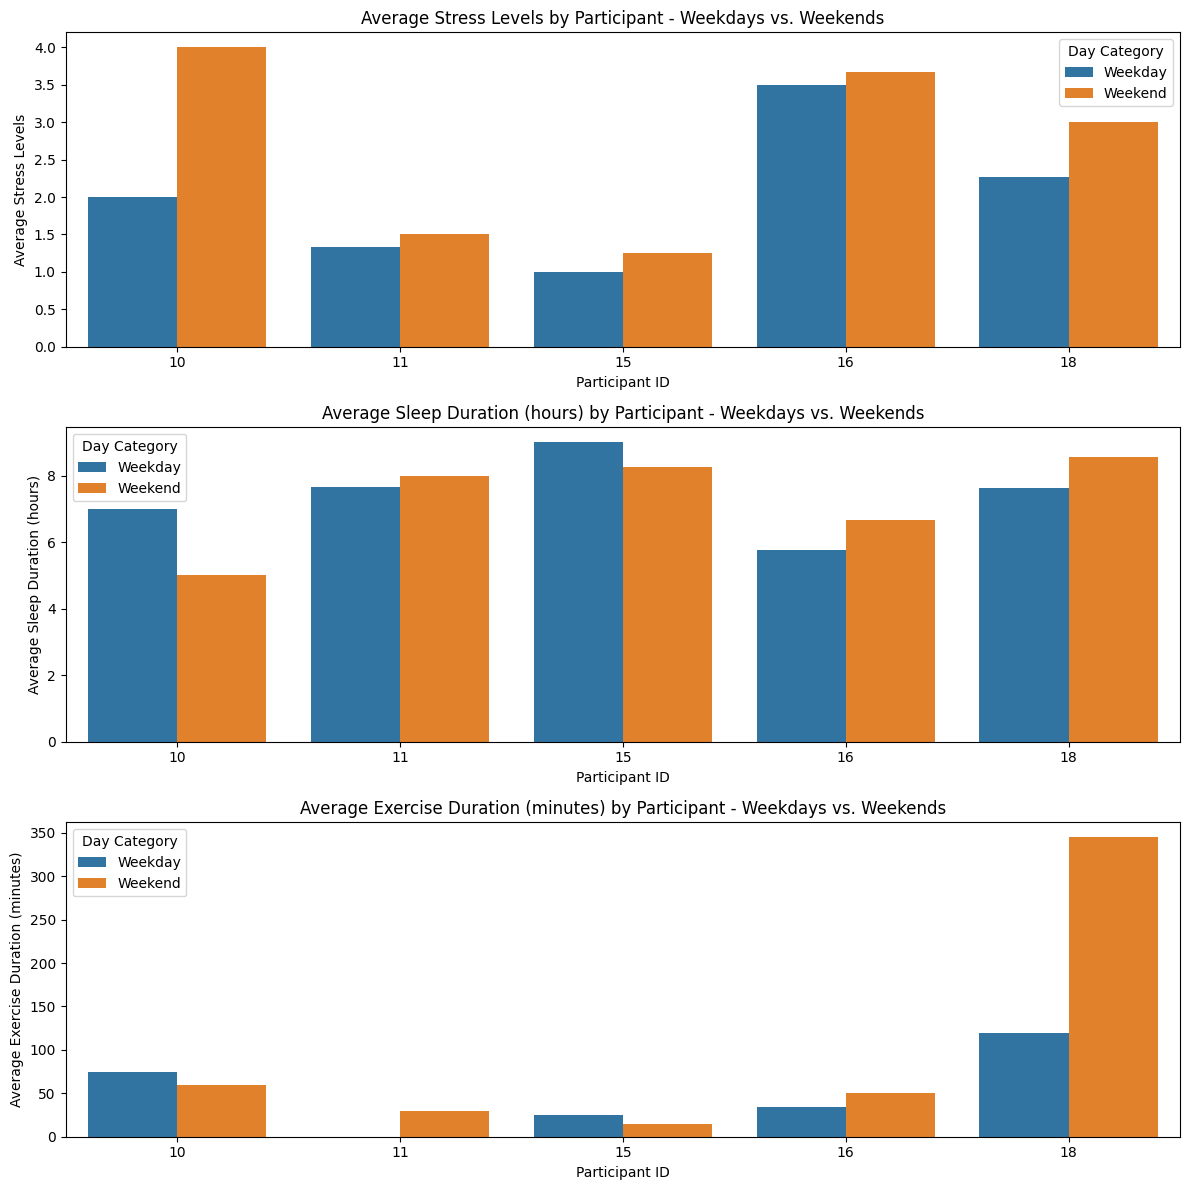

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the self-reported data
# Adjust the file path and separator as needed
self_reported_data = pd.read_csv('/content/drive/MyDrive/INFO 5610 Project-1/Project 1 - Survey (Responses) - Form Responses 1.csv')

# Convert 'Timestamp' to datetime and extract the day of the week
self_reported_data['Timestamp'] = pd.to_datetime(self_reported_data['Timestamp'])
self_reported_data['Day_of_week'] = self_reported_data['Timestamp'].dt.day_name()

# Categorize each entry as weekday or weekend
self_reported_data['Day_category'] = np.where(self_reported_data['Day_of_week'].isin(['Saturday', 'Sunday']), 'Weekend', 'Weekday')

# Group by participant and day category
grouped_data = self_reported_data.groupby(['What is your participant ID?', 'Day_category']).agg({
    'From the time you woke up this morning, until the present, how stressed did you feel today?': 'mean',
    'Approximately how many hours of sleep did you get last night?': 'mean',
    'From the time you woke up this morning, until the present, approximately how many minutes have you exercised?': 'mean'
}).reset_index()

# Filter out participants who don't have data for both weekdays and weekends
participants_with_both = grouped_data['What is your participant ID?'].value_counts()[grouped_data['What is your participant ID?'].value_counts() == 2].index
filtered_data = grouped_data[grouped_data['What is your participant ID?'].isin(participants_with_both)]

# Plot the averages for each metric by participant
plt.figure(figsize=(12, 12))
metrics = ['Stress Levels', 'Sleep Duration (hours)', 'Exercise Duration (minutes)']
for i, metric in enumerate(metrics):
    plt.subplot(3, 1, i+1)
    sns.barplot(data=filtered_data, x='What is your participant ID?', y=filtered_data.columns[i+2], hue='Day_category')
    plt.xlabel('Participant ID')
    plt.ylabel(f'Average {metric}')
    plt.title(f'Average {metric} by Participant - Weekdays vs. Weekends')
    plt.legend(title='Day Category')

plt.tight_layout()
plt.show()




In [ ]:
filtered_data.columns[i+2]

'From the time you woke up this morning, until the present, approximately how many minutes have you exercised?'

In [ ]:
self_report_data_df = self_reported_data.rename(columns={'What is your participant ID?': 'pid'})

In [ ]:
merged_data

,startDate,endDate,quantity,pid,Timestamp,"From the time you woke up this morning, until the present, how stressed did you feel today?",Approximately how many hours of sleep did you get last night?,How was your sleep quality last night?,"From the time you woke up this morning, until the present, how many steps have you taken?","From the time you woke up this morning, until the present, approximately how many minutes have you exercised?",Day_of_week,Day_category
0,2023-08-29 21:48:00,2023-08-29 21:49:00,1.0,11,2023-08-27 19:13:00,2,8.0,4,4589.0,60.0,Sunday,Weekend
1,2023-08-29 21:48:00,2023-08-29 21:49:00,1.0,11,2023-09-07 16:49:47,2,6.0,2,2600.0,0.0,Thursday,Weekday
2,2023-08-29 21:48:00,2023-08-29 21:49:00,1.0,11,2023-09-10 22:39:58,1,8.0,3,11714.0,0.0,Sunday,Weekend
3,2023-08-29 21:48:00,2023-08-29 21:49:00,1.0,11,2023-09-11 16:03:31,1,8.0,4,4179.0,0.0,Monday,Weekday
4,2023-08-29 21:48:00,2023-08-29 21:49:00,1.0,11,2023-09-15 22:26:27,1,9.0,4,9434.0,0.0,Friday,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...
49124,2023-09-10 20:15:00,2023-09-10 20:16:00,1.0,18,2023-09-12 21:40:28,3,7.0,2,12726.0,108.0,Tuesday,Weekday
49125,2023-09-10 20:15:00,2023-09-10 20:16:00,1.0,18,2023-09-13 21:15:32,2,6.0,1,17666.0,90.0,Wednesday,Weekday
49126,2023-09-10 20:15:00,2023-09-10 20:16:00,1.0,18,2023-09-14 21:33:32,1,8.5,4,8281.0,188.0,Thursday,Weekday
49127,2023-09-10 20:15:00,2023-09-10 20:16:00,1.0,18,2023-09-16 22:32:17,2,8.5,3,19489.0,98.0,Saturday,Weekend


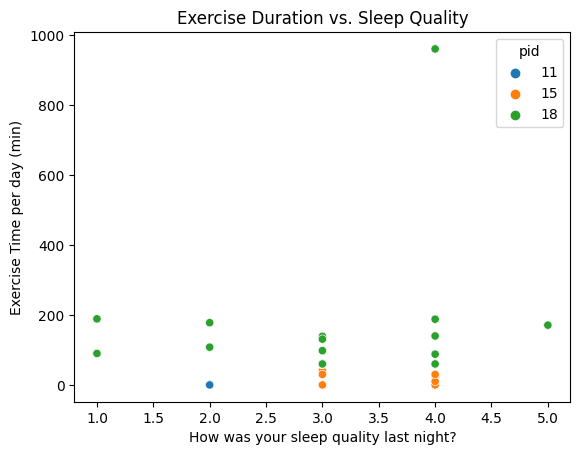

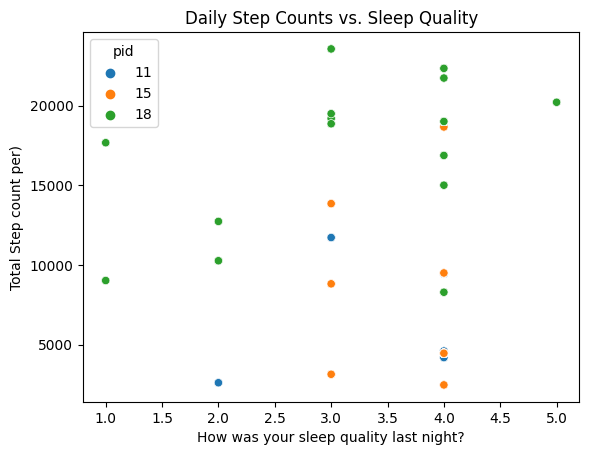

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Merge the data on participant ID
merged_data = pd.merge(exercise_time_df, self_report_data_df, on='pid')

# Convert timestamps to datetime objects
merged_data['Timestamp'] = pd.to_datetime(merged_data['Timestamp'])
merged_data['startDate'] = pd.to_datetime(merged_data['startDate'])
merged_data['endDate'] = pd.to_datetime(merged_data['endDate'])

# Calculate daily step counts and exercise duration
daily_step_counts = merged_data.groupby(merged_data['Timestamp'].dt.date)['quantity'].sum()
daily_exercise_duration = merged_data.groupby(merged_data['Timestamp'].dt.date)['From the time you woke up this morning, until the present, approximately how many minutes have you exercised?'].sum()

# Correlation analysis
correlation_exercise_sleep = merged_data[['From the time you woke up this morning, until the present, approximately how many minutes have you exercised?', 'How was your sleep quality last night?']].corr()
correlation_steps_sleep = merged_data[['From the time you woke up this morning, until the present, how many steps have you taken?', 'How was your sleep quality last night?']].corr()

# Visualize the relationships
sns.scatterplot(x='How was your sleep quality last night?',
                y='From the time you woke up this morning, until the present, approximately how many minutes have you exercised?',
                hue='pid',  # Color by participant ID
                data=merged_data)
plt.ylabel("Exercise Time per day (min)")
plt.title('Exercise Duration vs. Sleep Quality')
plt.show()

sns.scatterplot(x='How was your sleep quality last night?',
                y='From the time you woke up this morning, until the present, how many steps have you taken?',
                hue='pid',  # Color by participant ID
                data=merged_data)
plt.ylabel("Total Step count per)")
plt.title('Daily Step Counts vs. Sleep Quality')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**STATISTICAL ANALYSIS**

ANOVA

In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# Assume you have a list of DataFrame names
dataframe_names = [walking_steadiness_df, walking_speed_df, walking_hr_avg_df,step_count_df,flights_climbed_df,exercise_time_df,HRV_df,Respiratory_df,stand_df,Resting_hr_df]
dataframe_labels = ['Walking Steadiness', 'Walking Speed', 'Walking Heart Rate Average', 'Step Count', 'Flights Climbed', 'Exercise Time', 'Heart Rate Variability', 'Respiratory Rate', 'Stand Time', 'Resting Heart Rate']

for dataframe_name, labels in zip(dataframe_names,dataframe_labels):
    # Assuming the data is stored in variables named walking_steadiness_df1, walking_steadiness_df2, ...
    data_anova = dataframe_name  # Fetch the DataFrame based on the name

    # Data Preparation
    data_anova = data_anova[['pid', 'quantity']]

    # Group Data
    grouped_data = [group['quantity'].values for name, group in data_anova.groupby('pid')]

    # Perform ANOVA
    anova_result = f_oneway(*grouped_data)

    # Print ANOVA results
    print("ANOVA Results for", labels)
    print("F-statistic:", anova_result.statistic)
    print("p-value:", anova_result.pvalue)
    if anova_result.pvalue < 0.05:
        print("There are significant differences between at least two groups.")
    else:
        print("No significant differences between groups were found.")
    print('\n')



ANOVA Results for Walking Steadiness
F-statistic: 11.477078979434001
p-value: 1.1132514479801995e-07
There are significant differences between at least two groups.


ANOVA Results for Walking Speed
F-statistic: 56.43496698482941
p-value: 1.3703210349839482e-132
There are significant differences between at least two groups.


ANOVA Results for Walking Heart Rate Average
F-statistic: 24.084502303991478
p-value: 1.3048872882930438e-14
There are significant differences between at least two groups.


ANOVA Results for Step Count
F-statistic: 335.95282403587737
p-value: 0.0
There are significant differences between at least two groups.


ANOVA Results for Flights Climbed
F-statistic: 3.4607803667131676
p-value: 4.9340864095421225e-05
There are significant differences between at least two groups.


ANOVA Results for Exercise Time
F-statistic: nan
p-value: nan
No significant differences between groups were found.


ANOVA Results for Heart Rate Variability
F-statistic: 3.3959651313873898
p-valu

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# Assume you have a list of DataFrame names and corresponding names
dataframe_names = [walking_steadiness_df, walking_speed_df, walking_hr_avg_df, step_count_df, flights_climbed_df, exercise_time_df, HRV_df, Respiratory_df, stand_df, Resting_hr_df]
dataframe_labels = ['Walking Steadiness', 'Walking Speed', 'Walking Heart Rate Average', 'Step Count', 'Flights Climbed', 'Exercise Time', 'Heart Rate Variability', 'Respiratory Rate', 'Stand Time', 'Resting Heart Rate']

# Initialize lists to store results
labels = []
f_statistics = []
p_values = []

for dataframe, label in zip(dataframe_names, dataframe_labels):
    # Data Preparation
    data_anova = dataframe[['pid', 'quantity']]

    # Group Data
    grouped_data = [group['quantity'].values for name, group in data_anova.groupby('pid')]

    # Perform ANOVA
    anova_result = f_oneway(*grouped_data)

    # Store results
    labels.append(label)
    f_statistics.append(anova_result.statistic)
    p_values.append(anova_result.pvalue)

# Create a DataFrame to tabulate the results
results_df = pd.DataFrame({
    'Dataframe': labels,
    'F-Statistic': f_statistics,
    'P-Value': p_values
})

# Display the results
print("ANOVA Results:")
print(results_df)


ANOVA Results:
                    Dataframe  F-Statistic        P-Value
0          Walking Steadiness    11.477079   1.113251e-07
1               Walking Speed    56.434967  1.370321e-132
2  Walking Heart Rate Average    24.084502   1.304887e-14
3                  Step Count   335.952824   0.000000e+00
4             Flights Climbed     3.460780   4.934086e-05
5               Exercise Time          NaN            NaN
6      Heart Rate Variability     3.395965   9.453658e-03
7            Respiratory Rate   561.455876  5.280454e-133
8                  Stand Time    80.580444   4.883690e-66
9          Resting Heart Rate    14.687640   2.356381e-11


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


In [ ]:
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Assume you have a list of DataFrame names
dataframe_names = [walking_steadiness_df, walking_speed_df, walking_hr_avg_df, step_count_df, flights_climbed_df, exercise_time_df, HRV_df, Respiratory_df, stand_df, Resting_hr_df]
dataframe_labels = ['Walking Steadiness', 'Walking Speed', 'Walking Heart Rate Average', 'Step Count', 'Flights Climbed', 'Exercise Time', 'Heart Rate Variability', 'Respiratory Rate', 'Stand Time', 'Resting Heart Rate']

for dataframe_name, labels in zip(dataframe_names, dataframe_labels):
    # Assuming the data is stored in variables named walking_steadiness_df1, walking_steadiness_df2, ...
    data_anova = dataframe_name  # Fetch the DataFrame based on the name

    # Data Preparation
    data_anova = data_anova[['pid', 'quantity']]

    # Group Data
    grouped_data = [group['quantity'].values for name, group in data_anova.groupby('pid')]

    # Perform ANOVA
    anova_result = f_oneway(*grouped_data)

    # Print ANOVA results
    print("ANOVA Results for", labels)
    print("F-statistic:", anova_result.statistic)
    print("p-value:", anova_result.pvalue)
    if anova_result.pvalue < 0.05:
        print("There are significant differences between at least two groups.")

        # Perform Tukey's HSD post-hoc test
        tukey_results = pairwise_tukeyhsd(data_anova['quantity'], data_anova['pid'])
        print("Tukey HSD Results:\n", tukey_results)

    else:
        print("No significant differences between groups were found.")
    print('\n')


ANOVA Results for Walking Steadiness
F-statistic: 11.477078979434001
p-value: 1.1132514479801995e-07
There are significant differences between at least two groups.
Tukey HSD Results:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1     10   0.0656    0.0  0.0354  0.0959   True
     1     11   0.0591    0.0  0.0288  0.0893   True
     1     14   0.0197 0.5837 -0.0126   0.052  False
     1     15   0.0634    0.0  0.0332  0.0937   True
     1     16   0.0636    0.0  0.0313  0.0959   True
     1     18   0.0502 0.0001    0.02  0.0805   True
     1      2   0.0646    0.0  0.0357  0.0936   True
     1      5   0.0656    0.0  0.0333  0.0979   True
     1      6   0.0656 0.0011  0.0199  0.1113   True
     1      7   0.0656    0.0  0.0333  0.0979   True
     1      9   0.0396 0.0073  0.0072  0.0719   True
    10     11  -0.0065 0.9993 -0.0345  0.0215  False
    10     14  -0.045

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


Tukey HSD Results:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
    11     15 -15.6122 0.7885 -53.3306 22.1063  False
    11     18   -9.563 0.9574 -47.2354 28.1094  False
    11      2 -18.8264  0.651 -56.6295 18.9768  False
    11      9  -9.1371 0.9643 -46.9344 28.6603  False
    15     18   6.0492 0.2736  -2.2865 14.3849  False
    15      2  -3.2142 0.8605 -12.1222  5.6937  False
    15      9   6.4751 0.2693  -2.4083 15.3584  False
    18      2  -9.2634 0.0307 -17.9742 -0.5527   True
    18      9   0.4259 0.9999  -8.2597  9.1115  False
     2      9   9.6893 0.0344   0.4531 18.9255   True
-----------------------------------------------------


ANOVA Results for Respiratory Rate
F-statistic: 561.455875517219
p-value: 5.280454308396601e-133
There are significant differences between at least two groups.
Tukey HSD Results:
 Multiple Comparison of Means - Tukey HSD, 

Attribute Dictionary creation only for pid 9,15,18

In [ ]:
import random

# Set a seed for reproducibility


# Create a dictionary to store the selected data frames for each attribute
selected_data = {}
selected_participant_ids = [9,15,18]

# Specify the desired sample size
sample_size = 97

# Iterate through attribute data
for attribute_name, df in attribute_data.items():
    if attribute_name in ['HeartRateVariabilitySDNN', 'WalkingSpeed', 'StepCount', 'FlightsClimbed', 'AppleStandTime', 'AppleExerciseTime']:
        # Filter based on the specified participant IDs
        filtered_df = df[df['pid'].astype(int).isin(selected_participant_ids)]

        # Convert 'startDate' and 'endDate' to date objects without times
        filtered_df['startDate'] = pd.to_datetime(filtered_df['startDate']).dt.date
        filtered_df['endDate'] = pd.to_datetime(filtered_df['endDate']).dt.date

        # Filter entries with the same start date and end date
        filtered_df = filtered_df[filtered_df['startDate'] == filtered_df['endDate']]

        # Sample 97 random rows for each participant (or less if there are fewer rows)
        sampled_data = []
        for participant_id in selected_participant_ids:
            participant_data = filtered_df[filtered_df['pid'].astype(int) == participant_id]
            num_rows_available = len(participant_data)
            num_rows_to_sample = min(sample_size, num_rows_available)
            sampled_data.append(participant_data.sample(n=num_rows_to_sample, random_state=42))

        # Concatenate the sampled data frames
        sampled_df = pd.concat(sampled_data)

        # Drop 'startDate' and 'endDate' columns
        sampled_df = sampled_df.drop(['startDate', 'endDate'], axis=1)

        selected_data[attribute_name] = sampled_df

# Print the selected data frames
for attribute_name, df in selected_data.items():
    print(f"Attribute: {attribute_name}")
    print(df)

<ipython-input-22-45f8f6bcfbf7>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['startDate'] = pd.to_datetime(filtered_df['startDate']).dt.date
<ipython-input-22-45f8f6bcfbf7>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['endDate'] = pd.to_datetime(filtered_df['endDate']).dt.date
<ipython-input-22-45f8f6bcfbf7>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

Attribute: StepCount
       quantity (count) pid
11156               4.0   9
10984            1044.0   9
11408              10.0   9
10561              14.0   9
11045               8.0   9
...                 ...  ..
22776             168.0  18
22313            1024.0  18
23466            1638.0  18
21699             851.0  18
22586              86.0  18

[291 rows x 2 columns]
Attribute: FlightsClimbed
      quantity (count) pid
514                2.0   9
545                2.0   9
520                1.0   9
510                2.0   9
555                1.0   9
...                ...  ..
1123               1.0  18
1042               1.0  18
1047               2.0  18
1170               1.0  18
1156               1.0  18

[271 rows x 2 columns]
Attribute: WalkingSpeed
      quantity (m/s) pid
4185            0.61   9
4167            1.28   9
4235            0.90   9
4248            1.23   9
3973            1.13   9
...              ...  ..
8888            1.47  18
9613            1.35 

Attribute Dictionary creation for all pid's

In [ ]:
import random

# Set a seed for reproducibility
random.seed(42)

# Create a list of participant IDs you want to select
selected_participant_ids = [1,2,3,5,6,7,9,10,11,14,15,16,18]

# Create a dictionary to store the selected data frames for each attribute
selected_data = {}

# Specify the desired sample size
sample_size = 97

# Iterate through attribute data
for attribute_name, df in attribute_data.items():
    if attribute_name in ['HeartRateVariabilitySDNN', 'WalkingSpeed', 'StepCount', 'FlightsClimbed', 'AppleStandTime', 'AppleExerciseTime']:
        # Filter based on the specified participant IDs
        filtered_df = df[df['pid'].astype(int).isin(selected_participant_ids)]

        # Convert 'startDate' and 'endDate' to date objects without times
        filtered_df['startDate'] = pd.to_datetime(filtered_df['startDate']).dt.date
        filtered_df['endDate'] = pd.to_datetime(filtered_df['endDate']).dt.date

        # Filter entries with the same start date and end date
        filtered_df = filtered_df[filtered_df['startDate'] == filtered_df['endDate']]

        # Sample 97 random rows for each participant (or less if there are fewer rows)
        sampled_data = []
        for participant_id in selected_participant_ids:
            participant_data = filtered_df[filtered_df['pid'].astype(int) == participant_id]
            num_rows_available = len(participant_data)
            num_rows_to_sample = min(sample_size, num_rows_available)
            sampled_data.append(participant_data.sample(n=num_rows_available, random_state=42))

        # Concatenate the sampled data frames
        sampled_df = pd.concat(sampled_data)

        selected_data[attribute_name] = sampled_df

# Print the selected data frames
for attribute_name, df in selected_data.items():
    print(f"Attribute: {attribute_name}")
    print(df)




Attribute: StepCount
        startDate     endDate  quantity (count) pid
276    2023-09-12  2023-09-12             329.0   1
157    2023-08-27  2023-08-27              16.0   1
84     2023-09-10  2023-09-10              30.0   1
82     2023-09-01  2023-09-01               8.0   1
263    2023-09-11  2023-09-11              71.0   1
...           ...         ...               ...  ..
22382  2023-09-05  2023-09-05              24.0  18
21838  2023-09-08  2023-09-08              16.0  18
21873  2023-09-10  2023-09-10             940.0  18
22038  2023-08-31  2023-08-31             100.0  18
21601  2023-08-30  2023-08-30              32.0  18

[23600 rows x 4 columns]
Attribute: FlightsClimbed
       startDate     endDate  quantity (count) pid
33    2023-08-30  2023-08-30               4.0   1
36    2023-09-12  2023-09-12               4.0   1
4     2023-09-16  2023-09-16               3.0   1
13    2023-09-12  2023-09-12               3.0   1
30    2023-09-12  2023-09-12               5.0  

In [ ]:
selected_data

{'StepCount':        quantity (count) pid
 11156               4.0   9
 10984            1044.0   9
 11408              10.0   9
 10561              14.0   9
 11045               8.0   9
 ...                 ...  ..
 22776             168.0  18
 22313            1024.0  18
 23466            1638.0  18
 21699             851.0  18
 22586              86.0  18
 
 [291 rows x 2 columns],
 'FlightsClimbed':       quantity (count) pid
 514                2.0   9
 545                2.0   9
 520                1.0   9
 510                2.0   9
 555                1.0   9
 ...                ...  ..
 1123               1.0  18
 1042               1.0  18
 1047               2.0  18
 1170               1.0  18
 1156               1.0  18
 
 [271 rows x 2 columns],
 'WalkingSpeed':       quantity (m/s) pid
 4185            0.61   9
 4167            1.28   9
 4235            0.90   9
 4248            1.23   9
 3973            1.13   9
 ...              ...  ..
 8888            1.47  18
 9613  

In [ ]:
selected_data["HeartRateVariabilitySDNN"]

,quantity (ms),pid
159,23.266697,9
137,39.088920,9
191,111.990349,9
115,30.136783,9
178,71.527092,9
...,...,...
360,22.400307,18
400,39.143267,18
419,68.386176,18
369,24.278130,18


Dataframe creation for regression

In [ ]:
import pandas as pd

# Assuming selected_walkingspeed_data, selected_step_data, selected_flights_data,
# selected_exercise_data, and selected_stand_data are DataFrames
selected_heart_rate_data = selected_data['HeartRateVariabilitySDNN']
selected_step_data = selected_data['StepCount']
selected_flights_data = selected_data['FlightsClimbed']
selected_walkingspeed_data = selected_data['WalkingSpeed']
selected_exercise_data = selected_data['AppleExerciseTime']
selected_stand_data = selected_data['AppleStandTime']
# Function to ensure arrays have a specified length
def adjust_array_length(array, target_length):
    current_length = len(array)
    if current_length < target_length:
        # Pad the array with the last value to reach the target length
        pad_value = array[-1]
        return array + [pad_value] * (target_length - current_length)
    elif current_length > target_length:
        # Trim the array to the target length
        return array[:target_length]
    else:
        return array

# Extract the first column from each DataFrame and adjust the length
target_length = 271
column_data = {
    'quantity (m/s)': adjust_array_length(selected_walkingspeed_data.iloc[:, 0].values, target_length),
    'quantity (count)': adjust_array_length(selected_step_data.iloc[:, 0].values, target_length),
    'quantity (flight)': adjust_array_length(selected_flights_data.iloc[:, 0].values, target_length),
    'quantity (min)': adjust_array_length(selected_exercise_data.iloc[:, 0].values, target_length),
    'quantity (stand min)': adjust_array_length(selected_stand_data.iloc[:, 0].values, target_length),
    'pid': adjust_array_length(selected_stand_data.iloc[:, 0].values, target_length)
}

# Create a DataFrame
df = pd.DataFrame(column_data)

# Print the resulting DataFrame
print(df)


     quantity (m/s)  quantity (count)  quantity (flight)  quantity (min)  \
0              0.61               4.0                2.0             1.0   
1              1.28            1044.0                2.0             1.0   
2              0.90              10.0                1.0             1.0   
3              1.23              14.0                2.0             1.0   
4              1.13               8.0                1.0             1.0   
..              ...               ...                ...             ...   
266            1.49             111.0                1.0             1.0   
267            1.28             123.0                1.0             1.0   
268            1.15             119.0                2.0             1.0   
269            1.28              14.0                1.0             1.0   
270            1.23             706.0                1.0             1.0   

     quantity (stand min)  pid  
0                     3.0  3.0  
1                    

Dataframe creation for MICE

In [ ]:
import pandas as pd

# Assuming selected_walkingspeed_data, selected_step_data, selected_flights_data,
# selected_exercise_data, and selected_stand_data are DataFrames
selected_heart_rate_data = selected_data['HeartRateVariabilitySDNN']
selected_step_data = selected_data['StepCount']
selected_flights_data = selected_data['FlightsClimbed']
selected_walkingspeed_data = selected_data['WalkingSpeed']
selected_exercise_data = selected_data['AppleExerciseTime']
selected_stand_data = selected_data['AppleStandTime']
# Function to ensure arrays have a specified length
def adjust_array_length(array, target_length):
    current_length = len(array)
    if current_length < target_length:
        # Pad the array with the last value to reach the target length
        pad_value = array[-1]
        return array + [pad_value] * (target_length - current_length)
    elif current_length > target_length:
        # Trim the array to the target length
        return array[:target_length]
    else:
        return array

# Extract the first column from each DataFrame and adjust the length
target_length = 271
column_data = {
    'quantity (m/s)': adjust_array_length(selected_walkingspeed_data.iloc[:, 2].values, target_length),
    'quantity (count)': adjust_array_length(selected_step_data.iloc[:, 2].values, target_length),
    'quantity (flight)': adjust_array_length(selected_flights_data.iloc[:, 2].values, target_length),
    'quantity (min)': adjust_array_length(selected_exercise_data.iloc[:, 2].values, target_length),
    'quantity (stand min)': adjust_array_length(selected_stand_data.iloc[:, 2].values, target_length),
    'pid': adjust_array_length(selected_stand_data.iloc[:, 2].values, target_length)
}

# Create a DataFrame
df = pd.DataFrame(column_data)

# Print the resulting DataFrame
print(df)

     quantity (m/s)  quantity (count)  quantity (flight)  quantity (min)  \
0              0.93             329.0                4.0             1.0   
1              1.20              16.0                4.0             1.0   
2              0.89              30.0                3.0             1.0   
3              0.78               8.0                3.0             1.0   
4              1.13              71.0                5.0             1.0   
..              ...               ...                ...             ...   
266            1.31              16.0                1.0             1.0   
267            1.36             141.0                1.0             1.0   
268            1.18             671.0                2.0             1.0   
269            1.46               8.0                1.0             1.0   
270            1.38             180.0                2.0             1.0   

     quantity (stand min)  pid  
0                     3.0  3.0  
1                    

##**Linear Regression**

with regularisation, normalisation and hyperparameter fine tuning

In [ ]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the selected data for HeartRateVariabilitySDNN
selected_heart_rate_data = selected_data['HeartRateVariabilitySDNN']

# Features (independent variables)
features = df.iloc[:, :-1]

# Target variable
target = selected_heart_rate_data['quantity (ms)'][:271]

# Normalize the features using StandardScaler
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

# Split the normalized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_normalized, target, test_size=0.2, random_state=None)

# Initialize the Ridge regression model with regularization strength (alpha) of 1.0
ridge_model = Ridge(alpha=1.0)

# Train the model
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

# Now let's use the model to predict HeartRateVariabilitySDNN for new data
# Assuming `new_data` is a DataFrame with the same attributes as the training data
# Replace this with your actual new data for prediction
new_data = pd.DataFrame({
    'quantity (m/s)': [3.5, 4.2, 2.8],
    'quantity (count)': [8000, 10000, 6000],
    'quantity (flight)': [10, 12, 8],
    'quantity (min)': [300, 400, 250],
    'quantity (stand min)': [60, 45, 30],
})

# Normalize the new data using the same scaler
new_data_normalized = scaler.transform(new_data)

# Predict HeartRateVariabilitySDNN for the new data
predicted_heart_rate_variability = ridge_model.predict(new_data_normalized)

# Print the predicted HeartRateVariabilitySDNN
print('Predicted HeartRateVariabilitySDNN for new data:')
print(predicted_heart_rate_variability)




Mean Squared Error: 583.2979590155468
R-squared: 0.0031001893033026917
Predicted HeartRateVariabilitySDNN for new data:
[107.72412244  98.18690184  82.87161384]


In [ ]:
import pandas as pd
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error

# Load the selected data for HeartRateVariabilitySDNN
selected_heart_rate_data = selected_data['HeartRateVariabilitySDNN']

# Features (independent variables)
features = df.iloc[:, :-1]

# Target variable
target = selected_heart_rate_data['quantity (ms)'][:271]

# Normalize the features using StandardScaler
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
features_poly = poly.fit_transform(features_normalized)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_poly, target, test_size=0.2, random_state=42)

# Initialize the Ridge regression model with cross-validation for alpha selection
ridge_model = RidgeCV(cv=5)

# Train the model
ridge_model.fit(X_train, y_train)

# Evaluate the model using cross-validation
cv_mse = -cross_val_score(ridge_model, features_poly, target, cv=5, scoring='neg_mean_squared_error')
avg_cv_mse = cv_mse.mean()

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

# Evaluate the model using MSE on the test set
mse = mean_squared_error(y_test, y_pred)

print('Average Cross-Validation Mean Squared Error:', avg_cv_mse)
print('Mean Squared Error on Test Set:', mse)


Average Cross-Validation Mean Squared Error: 723.4514971857557
Mean Squared Error on Test Set: 661.9223961226614


**Predicting Outliers**

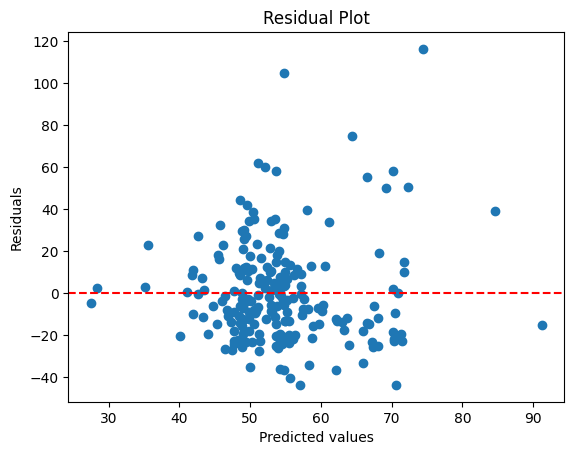

In [ ]:
import matplotlib.pyplot as plt

# ... Rest of the code ...

# Predictions on the training set
y_train_pred = ridge_model.predict(X_train)

# Residuals (difference between predicted and actual values) for the training set
residuals = y_train - y_train_pred

# Plot residuals against predicted values
plt.scatter(y_train_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

##**Combined Dataframe**

In [ ]:
import pandas as pd
import numpy as np

# Assuming selected_data is a dictionary with DataFrames for each attribute

# Create an empty DataFrame to store the 2nd column values
pid_values_df = pd.DataFrame()

# Get unique pid and start_date combinations
unique_combinations = []
for attribute_name, df in selected_data.items():
    unique_combinations.extend(df[['pid', 'startDate']].drop_duplicates().values.tolist())

# Create a DataFrame with unique pid and start_date combinations
unique_combinations_df = pd.DataFrame(unique_combinations, columns=['pid', 'startDate'])

# Iterate through the selected data frames
for attribute_name, df in selected_data.items():
    # Group by 'pid' and 'start_date' and extract the 2nd column values for each 'pid' and 'start_date'
    pid_values = df.groupby(['pid', 'startDate']).apply(lambda x: x.iloc[:, 2].sum()).reset_index()

    # Merge with the DataFrame containing unique combinations to fill in missing values
    pid_values = pd.merge(unique_combinations_df, pid_values, on=['pid', 'startDate'], how='left')

    # Rename the columns and add to the main DataFrame
    pid_values.rename(columns={0: attribute_name}, inplace=True)
    pid_values_df = pd.concat([pid_values_df, pid_values], axis=1)

# Reset the index to have a sequential index
pid_values_df.reset_index(drop=True, inplace=True)

# Fill NaN for missing values
pid_values_df.fillna(np.nan, inplace=True)
# Print the DataFrame
print("DataFrame storing 2nd column values with respect to pid and start_date:")
pid_values_df


DataFrame storing 2nd column values with respect to pid and start_date:


,pid,startDate,StepCount,pid,startDate,FlightsClimbed,pid,startDate,WalkingSpeed,pid,startDate,AppleExerciseTime,pid,startDate,HeartRateVariabilitySDNN,pid,startDate,AppleStandTime
0,1,2023-09-12,6044.0,1,2023-09-12,15.0,1,2023-09-12,25.19,1,2023-09-12,NaN,1,2023-09-12,NaN,1,2023-09-12,NaN
1,1,2023-08-27,169.0,1,2023-08-27,NaN,1,2023-08-27,0.81,1,2023-08-27,NaN,1,2023-08-27,NaN,1,2023-08-27,NaN
2,1,2023-09-10,140.0,1,2023-09-10,NaN,1,2023-09-10,NaN,1,2023-09-10,NaN,1,2023-09-10,NaN,1,2023-09-10,NaN
3,1,2023-09-01,1130.0,1,2023-09-01,7.0,1,2023-09-01,4.44,1,2023-09-01,NaN,1,2023-09-01,NaN,1,2023-09-01,NaN
4,1,2023-09-11,3667.0,1,2023-09-11,6.0,1,2023-09-11,14.37,1,2023-09-11,NaN,1,2023-09-11,NaN,1,2023-09-11,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,18,2023-09-14,21025.0,18,2023-09-14,26.0,18,2023-09-14,60.77,18,2023-09-14,188.0,18,2023-09-14,433.116961,18,2023-09-14,216.0
1095,18,2023-09-11,28378.0,18,2023-09-11,24.0,18,2023-09-11,47.59,18,2023-09-11,80.0,18,2023-09-11,260.393001,18,2023-09-11,162.0
1096,18,2023-09-18,15403.0,18,2023-09-18,7.0,18,2023-09-18,16.26,18,2023-09-18,65.0,18,2023-09-18,66.159625,18,2023-09-18,90.0
1097,18,2023-08-28,37788.0,18,2023-08-28,24.0,18,2023-08-28,68.51,18,2023-08-28,104.0,18,2023-08-28,210.670883,18,2023-08-28,181.0


In [ ]:
pip install fancyimpute


##**MICE**

In [ ]:
from fancyimpute import IterativeImputer

columns_to_exclude = ['pid', 'startDate']

# Exclude the specified columns
df_for_imputation = pid_values_df.drop(columns=columns_to_exclude)

# Perform MICE imputation
imputer = IterativeImputer()
imputed_data = imputer.fit_transform(df_for_imputation)

# Create a new DataFrame with imputed data
df_imputed = pd.DataFrame(imputed_data, columns=df_for_imputation.columns)

# Re-add excluded columns
first_two_columns = pid_values_df.iloc[:, :2]
merged_df = first_two_columns.merge(df_imputed, left_index=True, right_index=True, how='right')

# Display the imputed DataFrame
print("Imputed DataFrame:")
merged_df

Imputed DataFrame:


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,pid,startDate,StepCount,FlightsClimbed,WalkingSpeed,AppleExerciseTime,HeartRateVariabilitySDNN,AppleStandTime
0,1,2023-09-12,6044.0,15.000000,25.190000,15.732256,212.028592,59.225871
1,1,2023-08-27,169.0,3.061617,0.810000,3.084340,239.613878,28.481150
2,1,2023-09-10,140.0,3.968554,17.675397,-9.198551,209.364941,24.142787
3,1,2023-09-01,1130.0,7.000000,4.440000,6.192385,232.930583,34.386613
4,1,2023-09-11,3667.0,6.000000,14.370000,9.694988,230.660831,45.397647
...,...,...,...,...,...,...,...,...
1094,18,2023-09-14,21025.0,26.000000,60.770000,188.000000,433.116961,216.000000
1095,18,2023-09-11,28378.0,24.000000,47.590000,80.000000,260.393001,162.000000
1096,18,2023-09-18,15403.0,7.000000,16.260000,65.000000,66.159625,90.000000
1097,18,2023-08-28,37788.0,24.000000,68.510000,104.000000,210.670883,181.000000


In [ ]:
df_for_imputation

,StepCount,FlightsClimbed,WalkingSpeed,AppleExerciseTime,HeartRateVariabilitySDNN,AppleStandTime
0,6044.0,15.0,25.19,NaN,NaN,NaN
1,169.0,NaN,0.81,NaN,NaN,NaN
2,140.0,NaN,NaN,NaN,NaN,NaN
3,1130.0,7.0,4.44,NaN,NaN,NaN
4,3667.0,6.0,14.37,NaN,NaN,NaN
...,...,...,...,...,...,...
1094,21025.0,26.0,60.77,188.0,433.116961,216.0
1095,28378.0,24.0,47.59,80.0,260.393001,162.0
1096,15403.0,7.0,16.26,65.0,66.159625,90.0
1097,37788.0,24.0,68.51,104.0,210.670883,181.0


In [ ]:
selected_data

,startDate,endDate,quantity (ms),pid,quantity (m/s),quantity (count),quantity (min)
385,2023-09-01 17:49:42.828176384,2023-09-01 17:50:42.665704704,65.134167,18,NaN,NaN,NaN
331,2023-09-07 20:37:35.488814848,2023-09-07 20:38:35.305495552,68.861313,18,NaN,NaN,NaN
428,2023-09-09 01:18:03.387805696,2023-09-09 01:19:02.660708864,42.789943,18,NaN,NaN,NaN
379,2023-09-14 21:13:13.159089152,2023-09-14 21:14:12.752835584,48.494670,18,NaN,NaN,NaN
406,2023-09-10 13:38:58.249103104,2023-09-10 13:39:57.869277696,76.718220,18,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2276,2023-09-16 16:26:00.000000000,2023-09-16 16:27:00.000000000,NaN,15,NaN,NaN,1.0
2374,2023-09-08 00:32:00.000000000,2023-09-08 00:33:00.000000000,NaN,15,NaN,NaN,1.0
1695,2023-09-16 16:25:00.000000000,2023-09-16 16:26:00.000000000,NaN,15,NaN,NaN,1.0
2383,2023-09-07 22:09:00.000000000,2023-09-07 22:10:00.000000000,NaN,15,NaN,NaN,1.0
